In [106]:
!grep ',,' data/house_train.csv
!grep ',,' data/house_test.csv

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [108]:
# We won't specify column names/types because the data is small enough that we don't hit issues.
# 'NA' is used both as a categorical value in several of the columns and to represent NaNs.  
# We'll need to sort this out when we engineer features.
train = pd.read_csv('data/house_train.csv')
test = pd.read_csv('data/house_test.csv')

In [109]:
train_trans = pd.DataFrame()
test_trans = pd.DataFrame()

In [110]:
# Categorical (Text) - Encode label -> categorical (integer)
# Categorical (Integer) - One hot!
# Continuous (Float/Integer) - DTB! Check for missing (bomb if missing...), convert to float (if necessary...), check distribution (bomb if skewed, etc...), transform (BoxCox) and scale (StandardScaler).

categorical_text = train.dtypes[train.dtypes == np.object].index.values
continuous_float = train.dtypes[train.dtypes == np.float].index.values

continuous_int_str = 'LotArea, YearBuilt, YearRemodAdd, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold'
continuous_int = continuous_int_str.split(', ')

categorical_int = ['MSSubClass', 'OverallQual', 'OverallCond']

In [111]:
def continuous_distribution(column_name, train, test):
  
  plt.figure(figsize=(20,5))

  sns.distplot(train[column_name], label='Train')
  sns.distplot(test[column_name], label='Test')

  plt.legend()
  plt.show()
  
  plt.figure(figsize=(20,5))

  plt.subplot(121)
  sns.boxplot(train[column_name])
  plt.subplot(122)
  sns.boxplot(test[column_name])

  plt.legend()
  plt.show()

In [112]:
def process_continuous(column_name):
  
  global train, train_trans, test, test_trans
  
  train_df = train
  test_df = test
  
  if ((train[column_name].isnull().sum() > 0) | (test[column_name].isnull().sum() > 0)):
    train_df = train_trans
    train_trans['%s_NaN'%column_name] = (train[column_name].isnull()).astype(np.int)
    train_trans[column_name] = train[column_name].fillna(train[column_name].median())
    test_df = test_trans
    test_trans['%s_NaN'%column_name] = (test[column_name].isnull()).astype(np.int)
    test_trans[column_name] = test[column_name].fillna(test[column_name].median())
    
  # continuous_distribution(column_name, train_df, test_df)
  
  train_trans[column_name] = np.log1p(train_df[column_name])
  test_trans[column_name] = np.log1p(test_df[column_name])
  
  '''scaler = preprocessing.StandardScaler()
  train_trans[column_name] = scaler.fit_transform(train_trans[column_name].values.reshape(-1,1).astype(np.float))
  test_trans[column_name] = scaler.transform(test_trans[column_name].values.reshape(-1,1).astype(np.float))'''
  
  continuous_distribution(column_name, train_trans, test_trans)

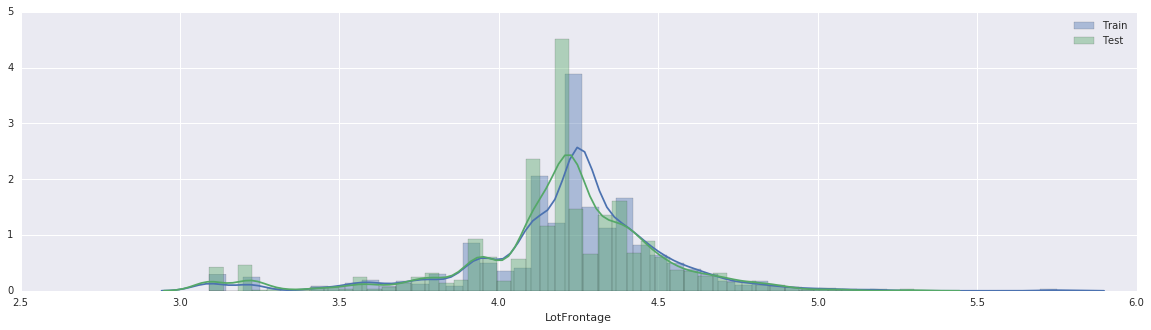

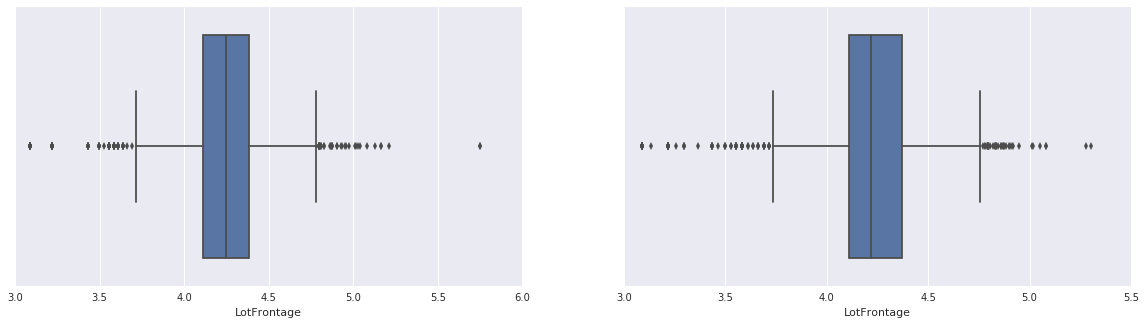

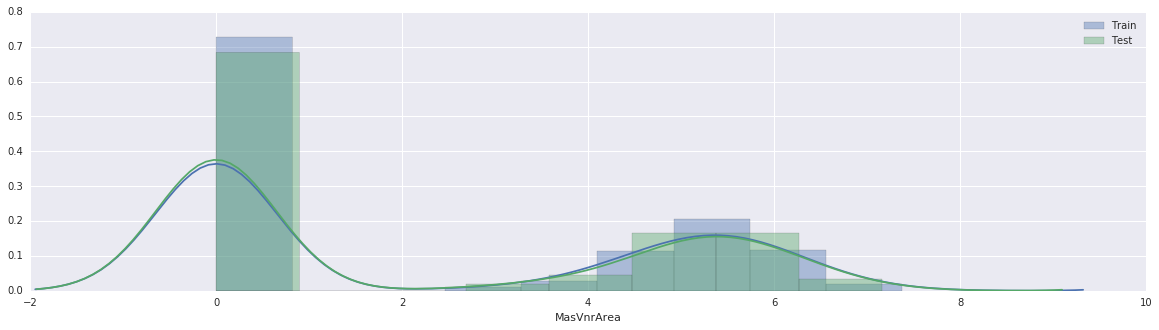

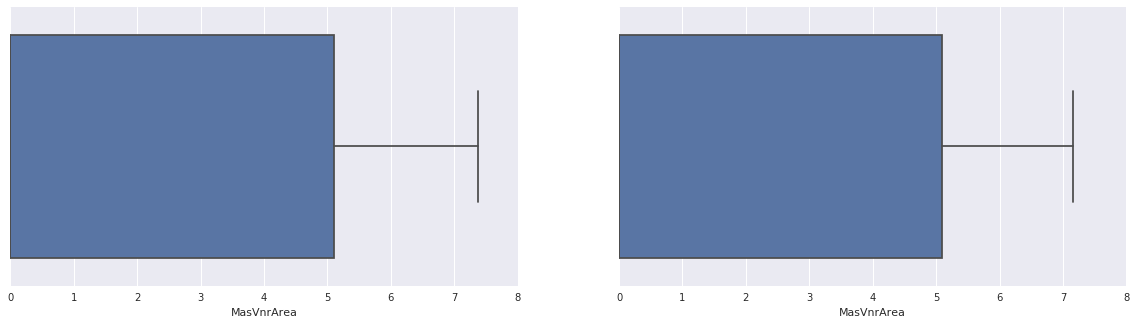

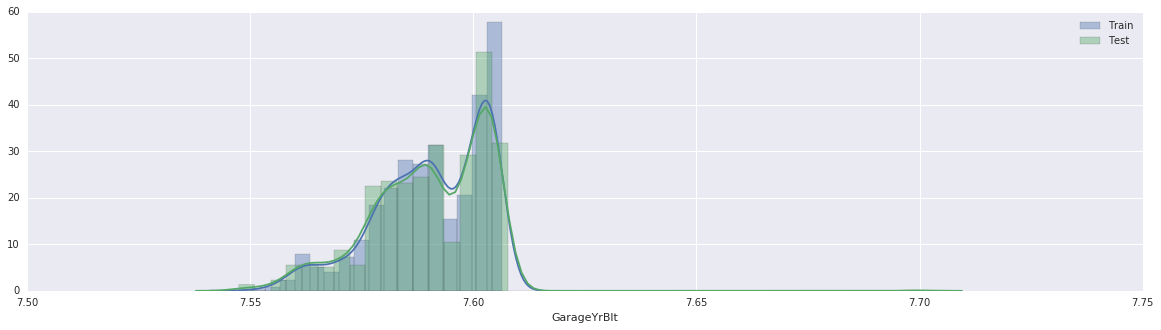

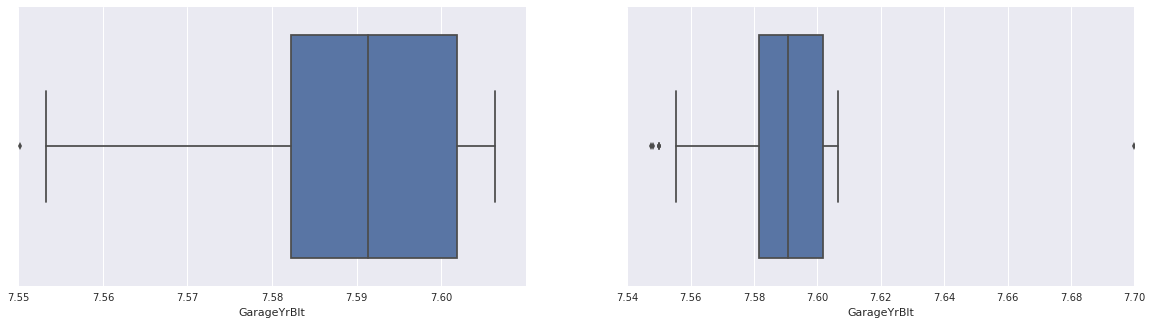

In [113]:
for column_name in continuous_float:
  process_continuous(column_name)

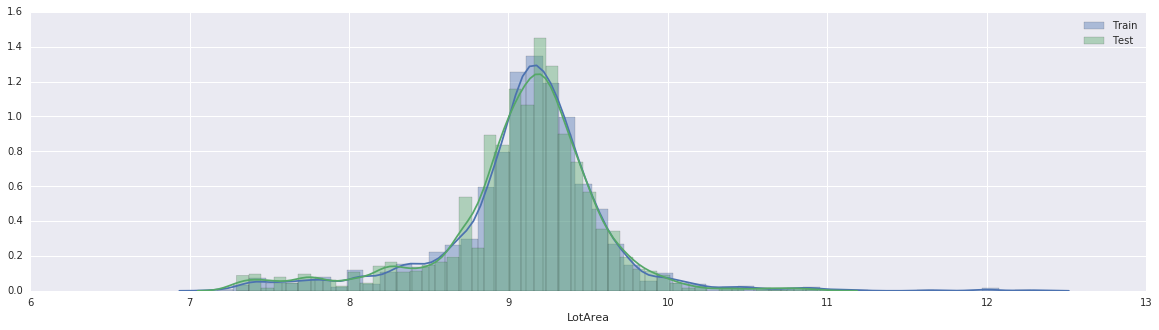

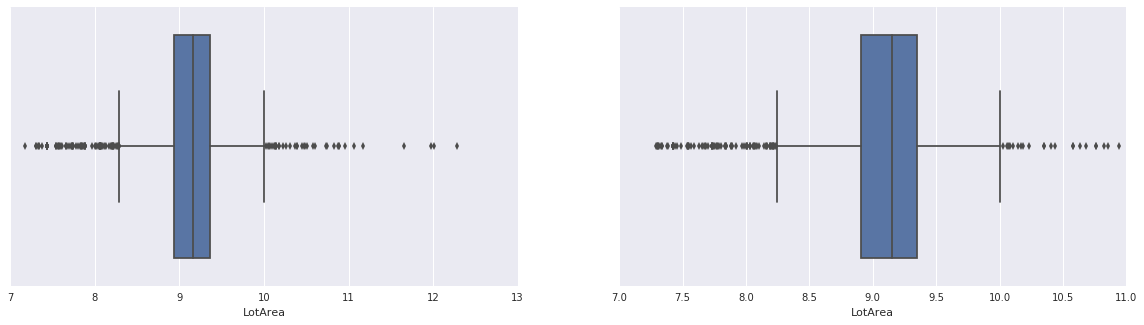

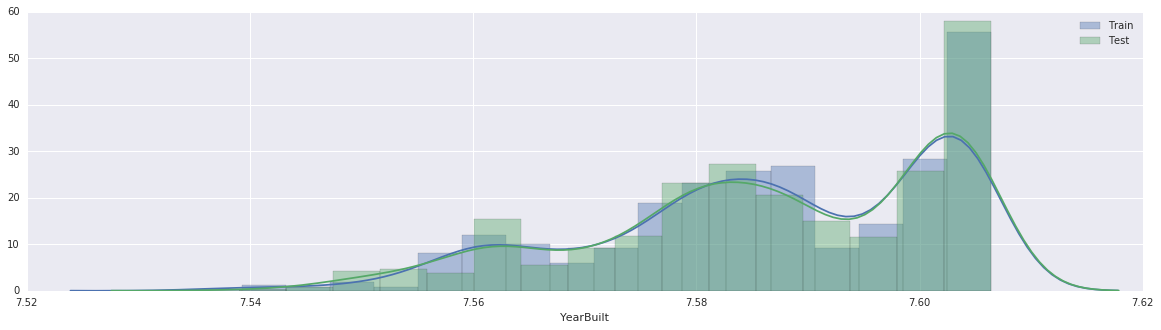

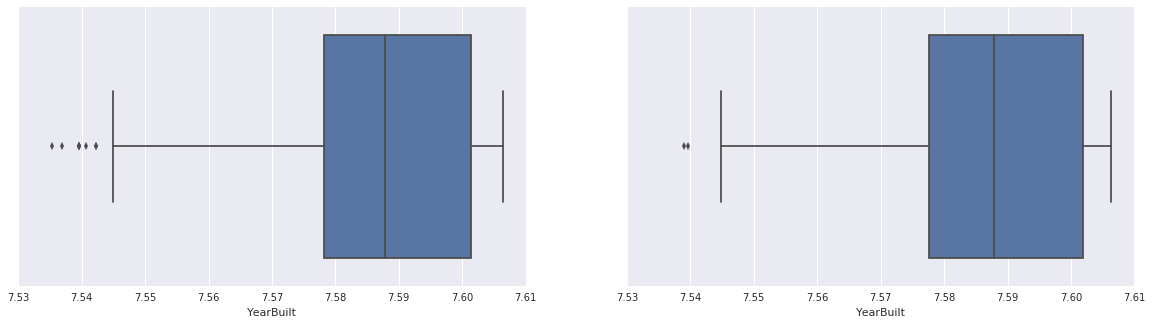

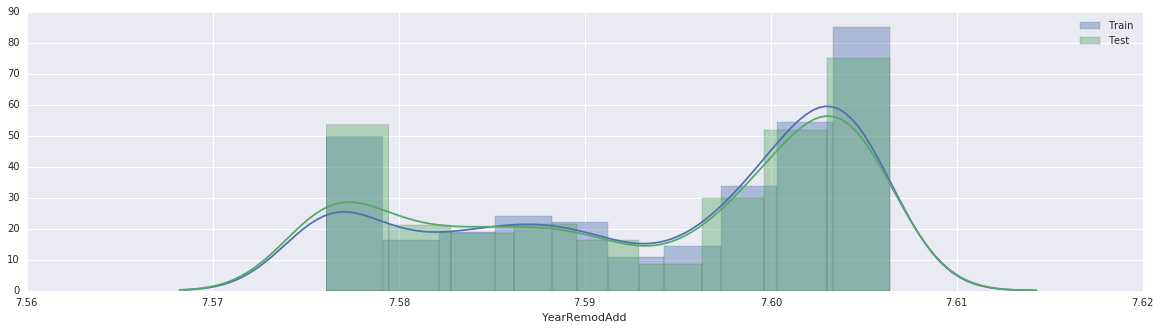

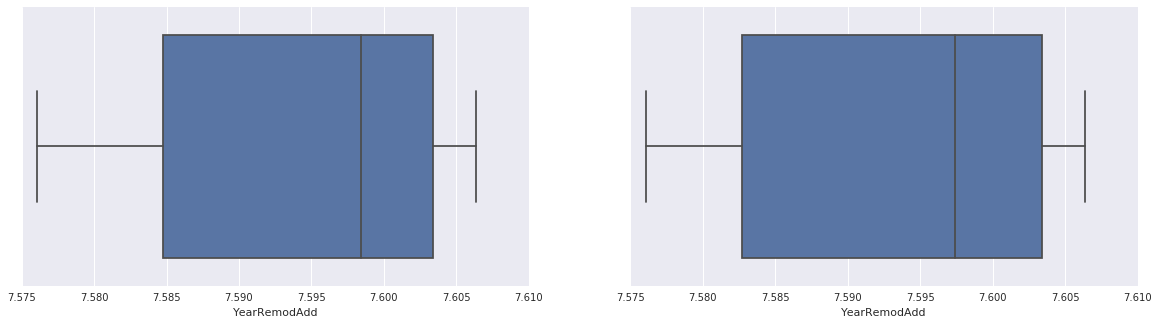

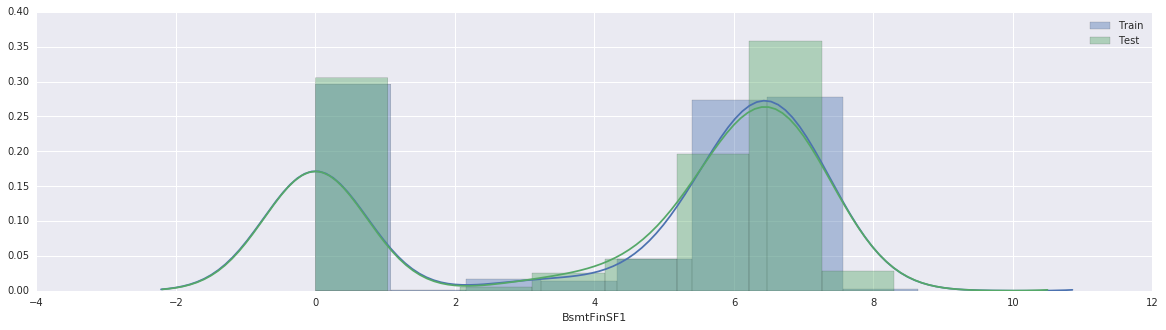

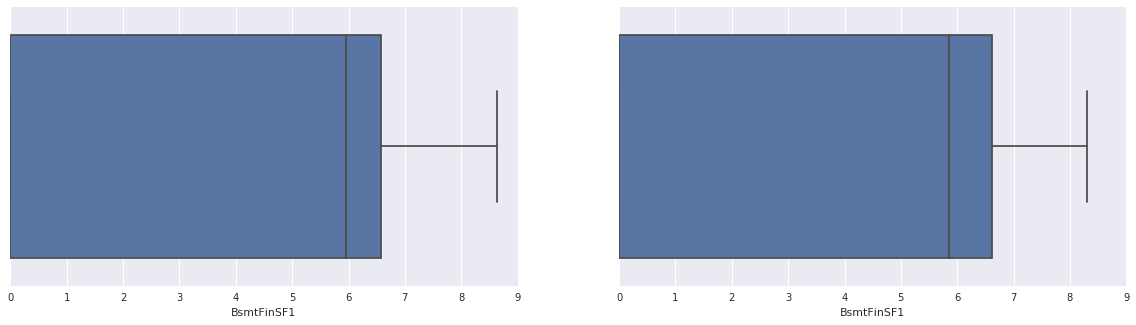

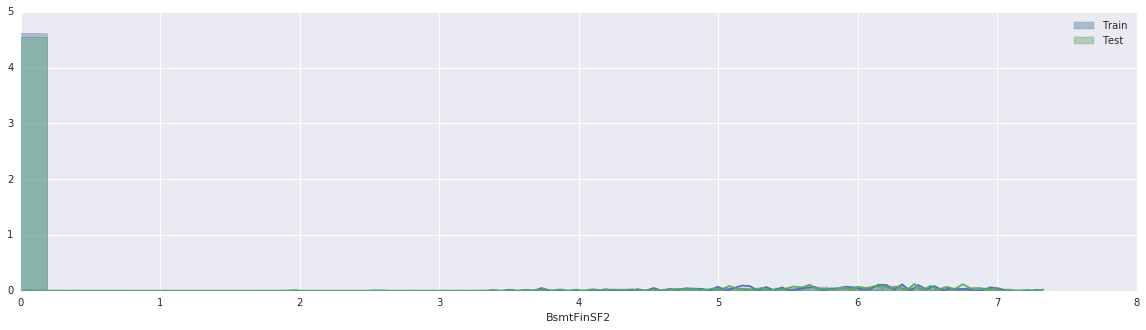

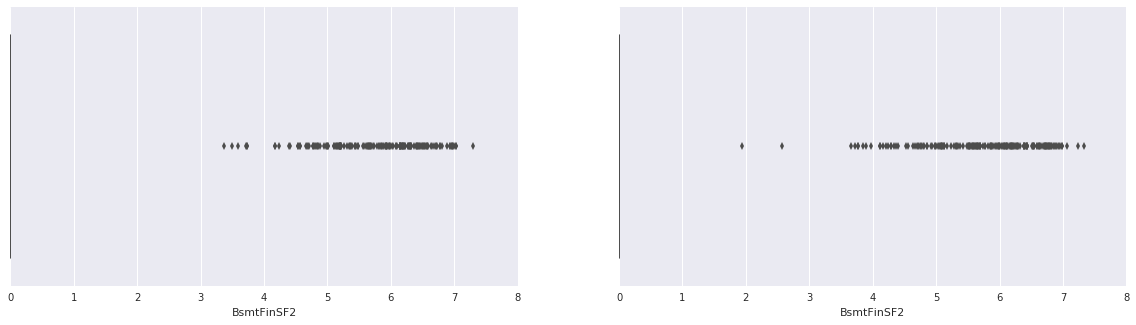

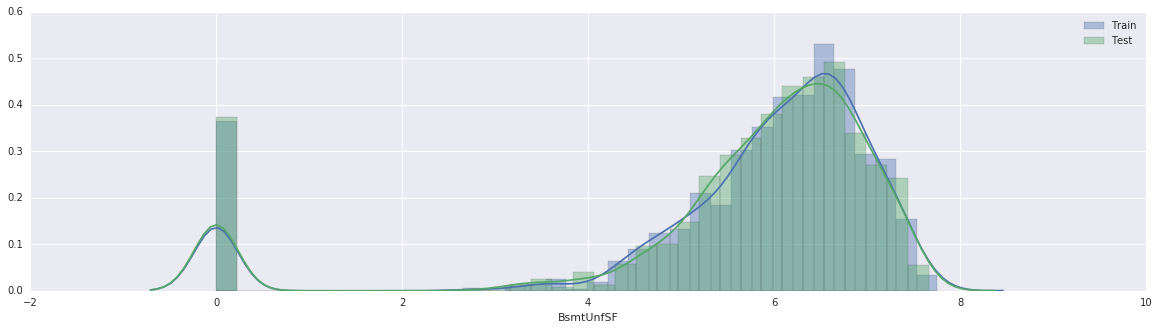

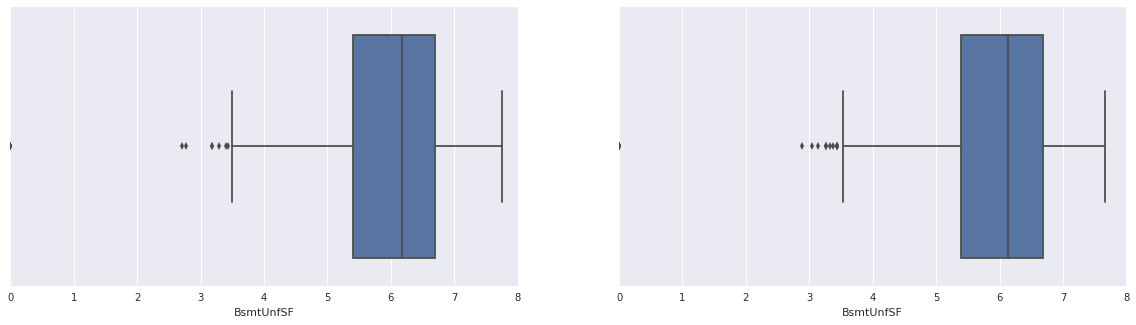

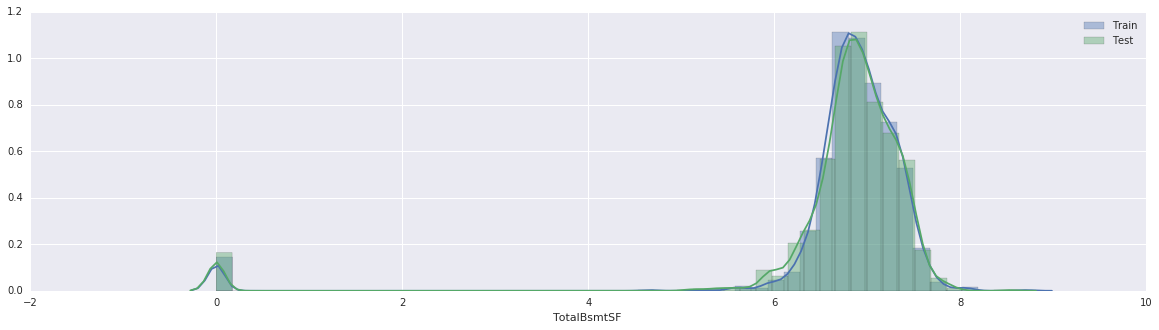

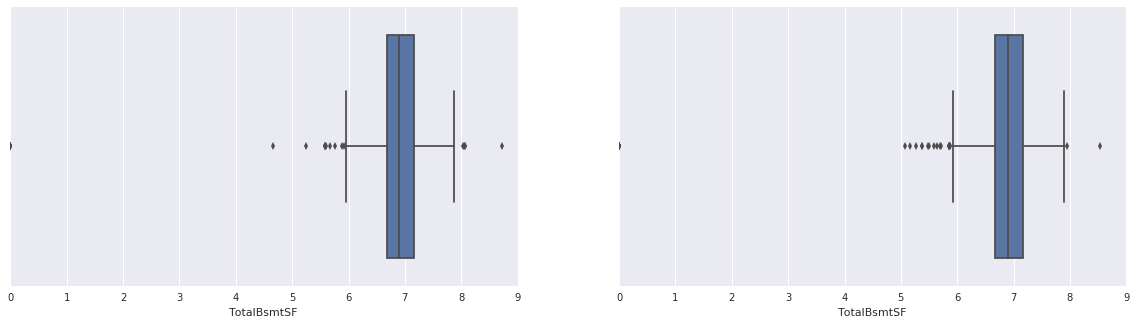

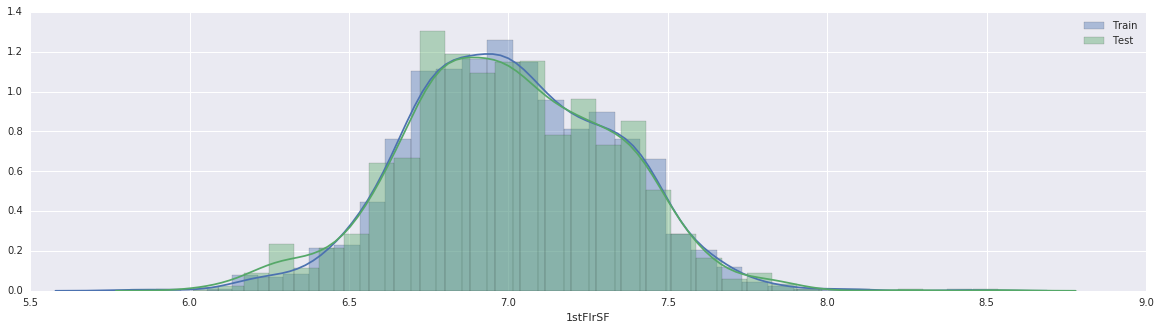

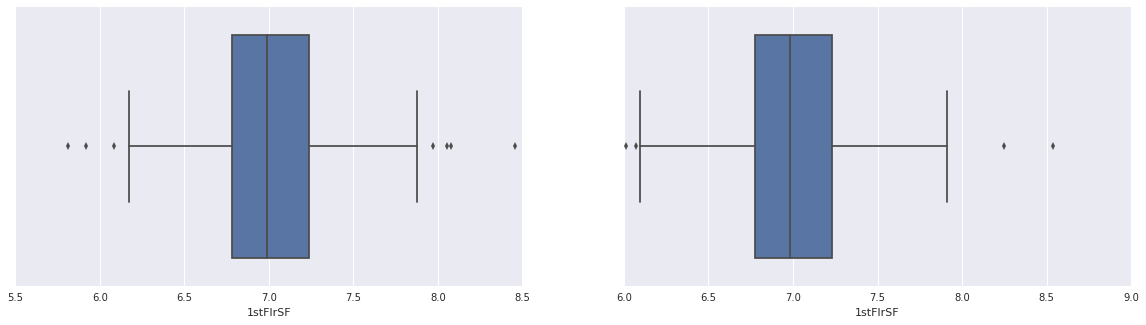

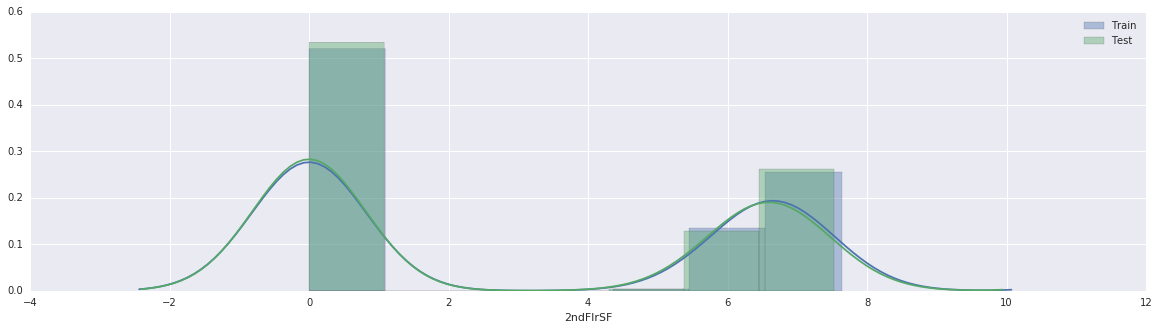

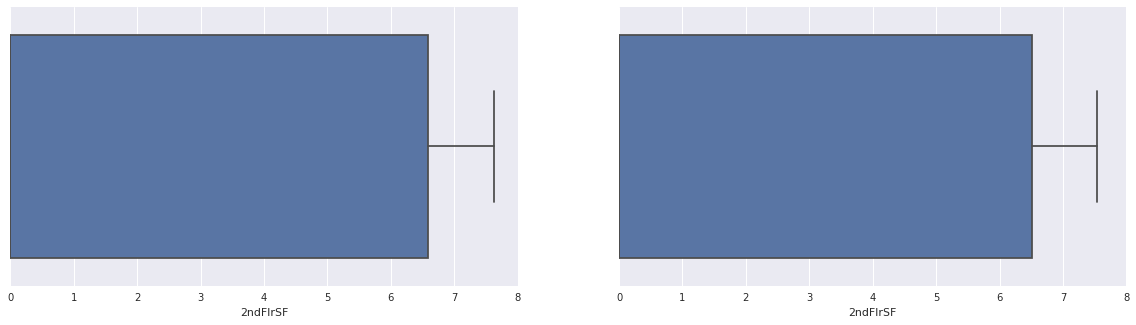

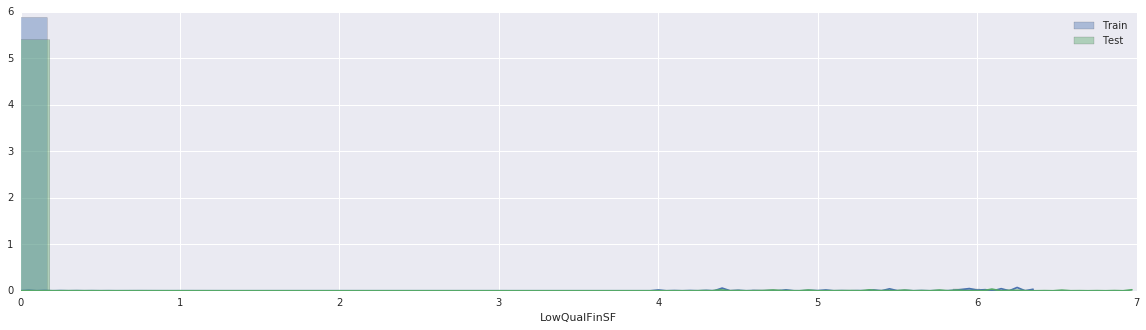

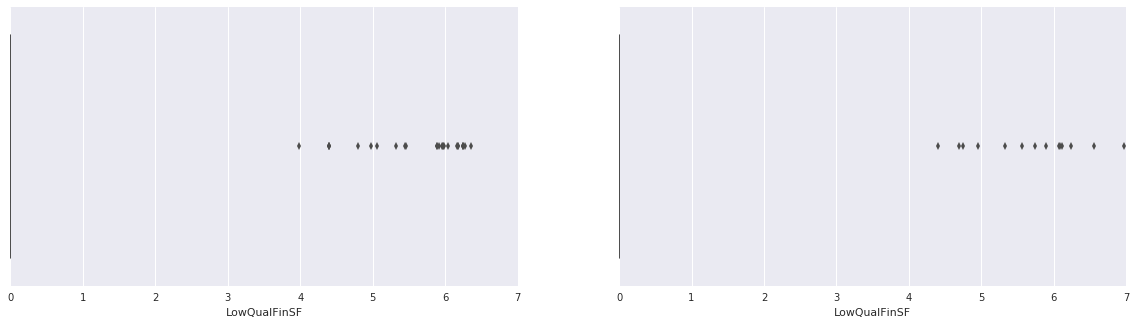

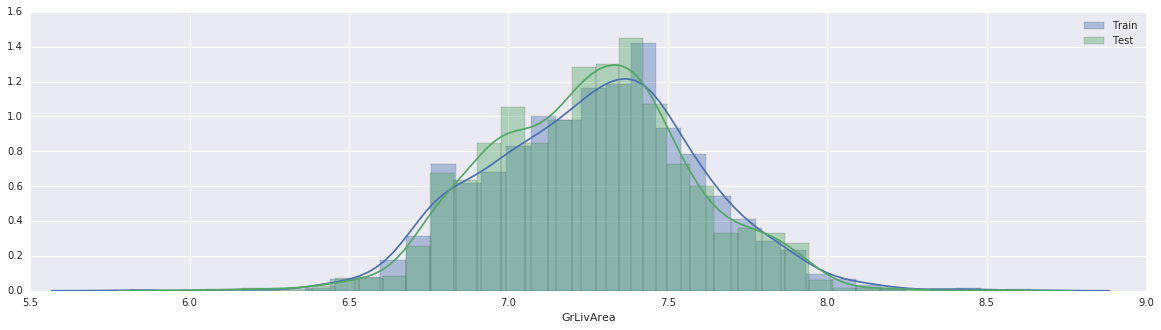

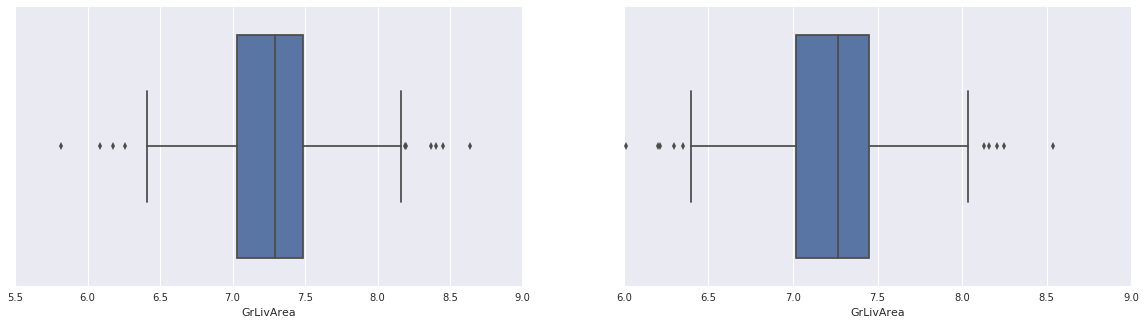

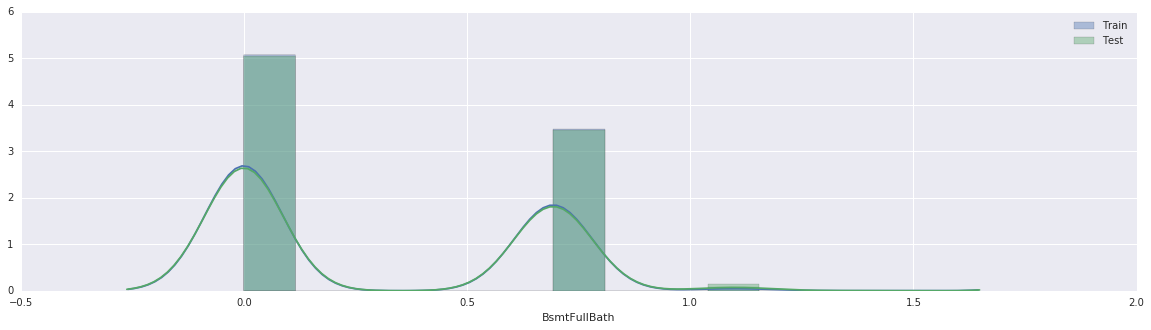

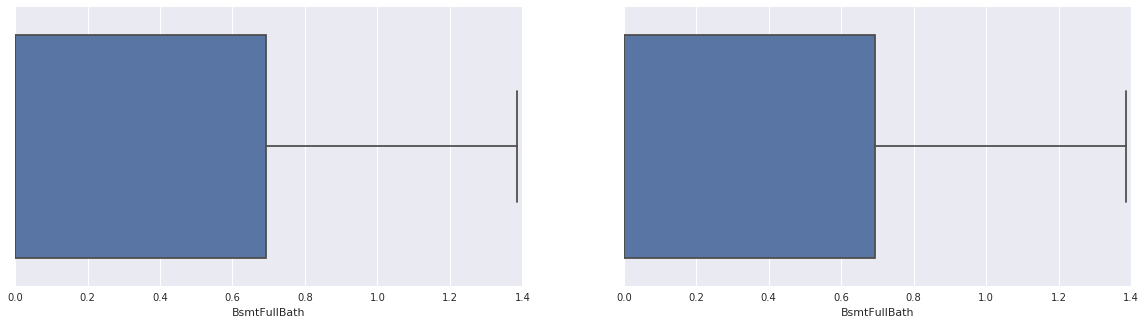

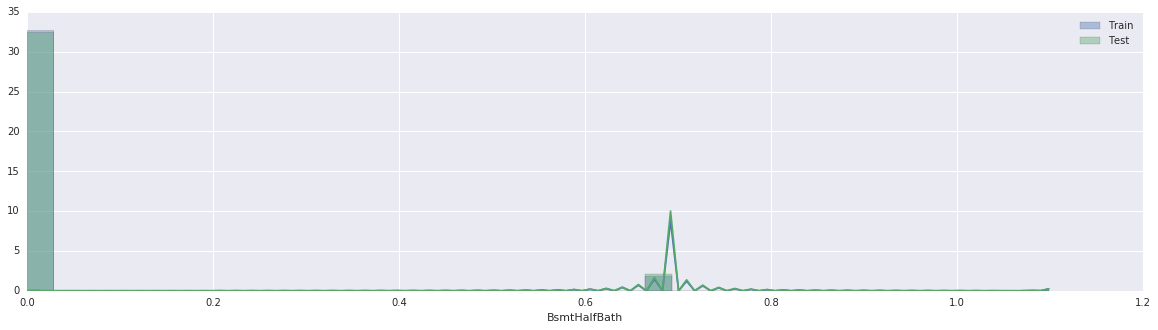

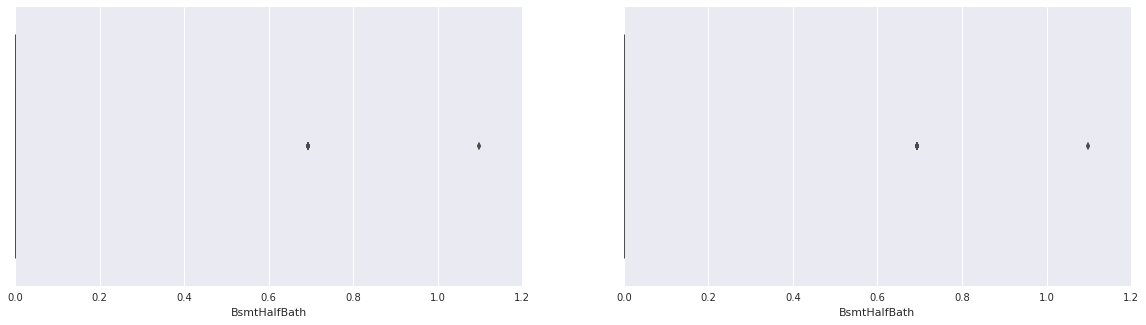

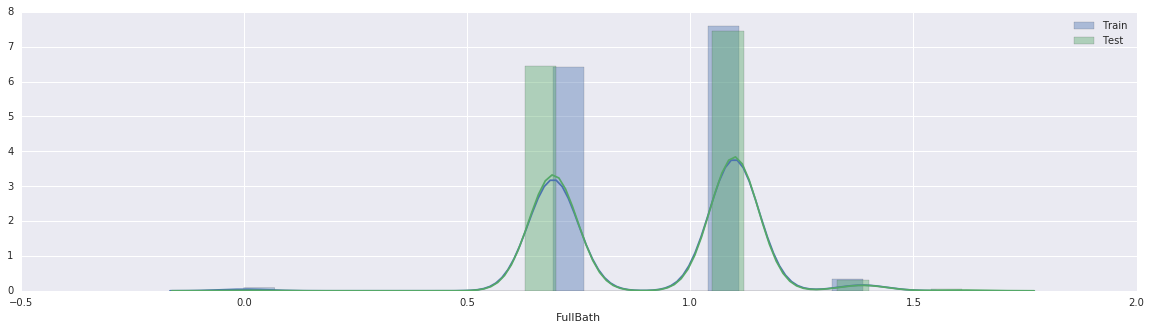

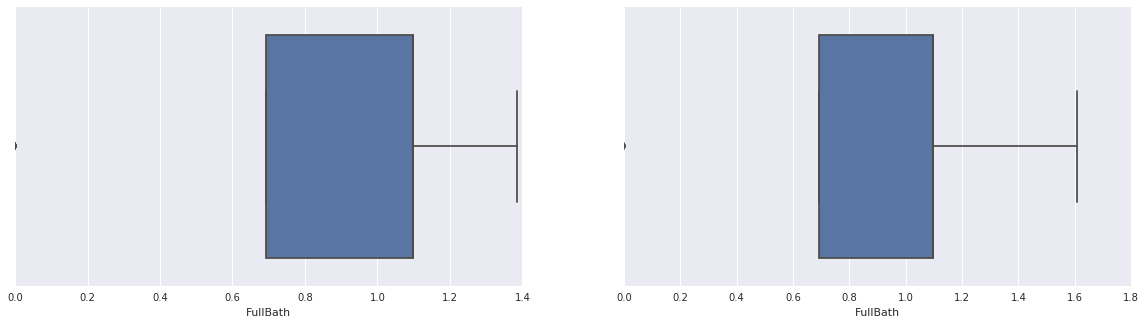

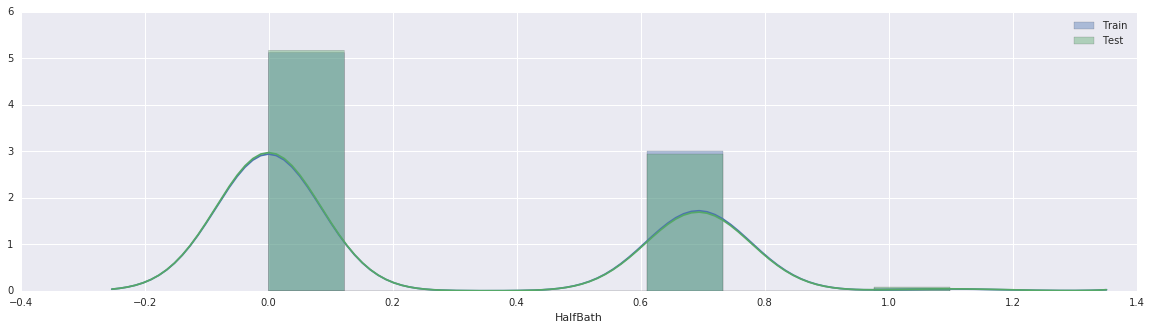

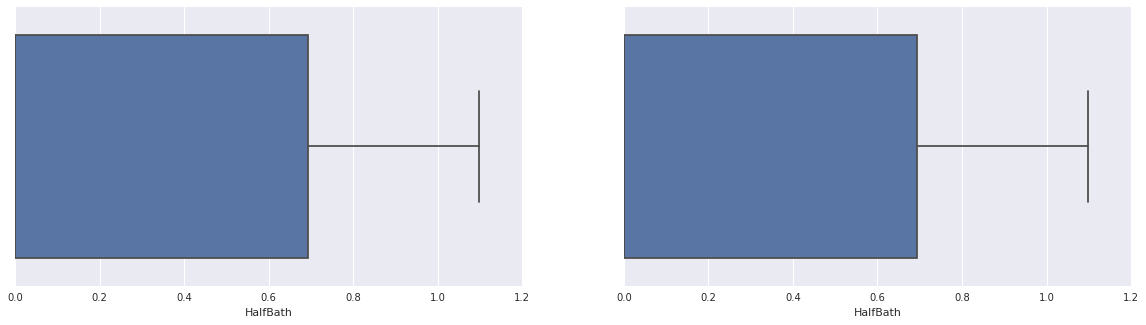

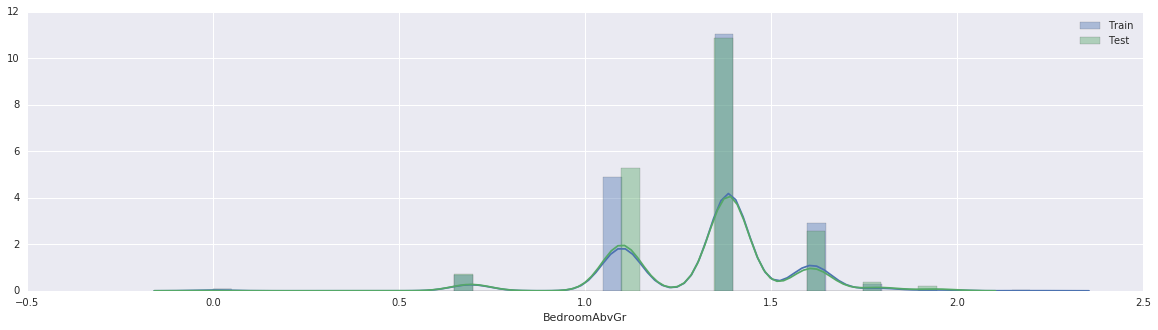

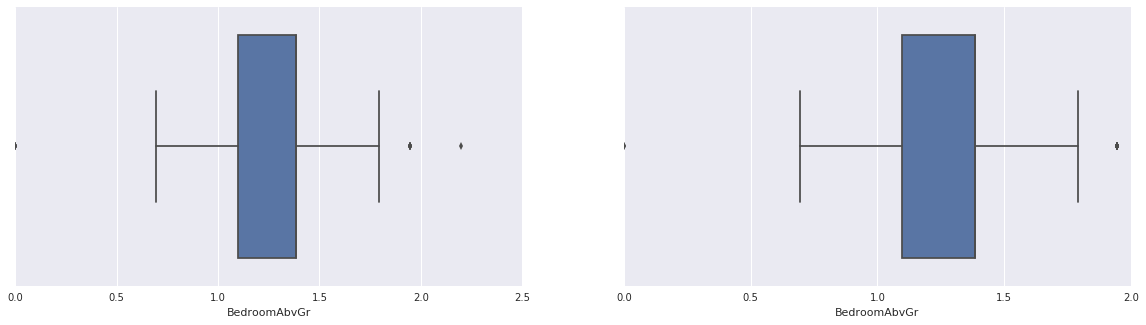

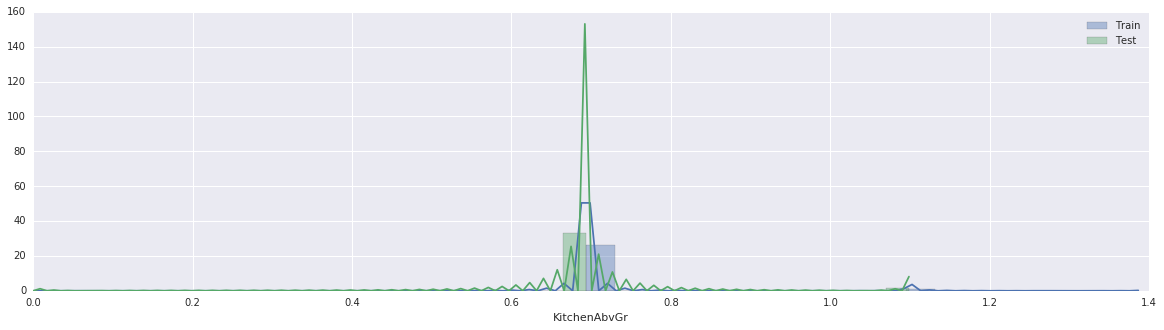

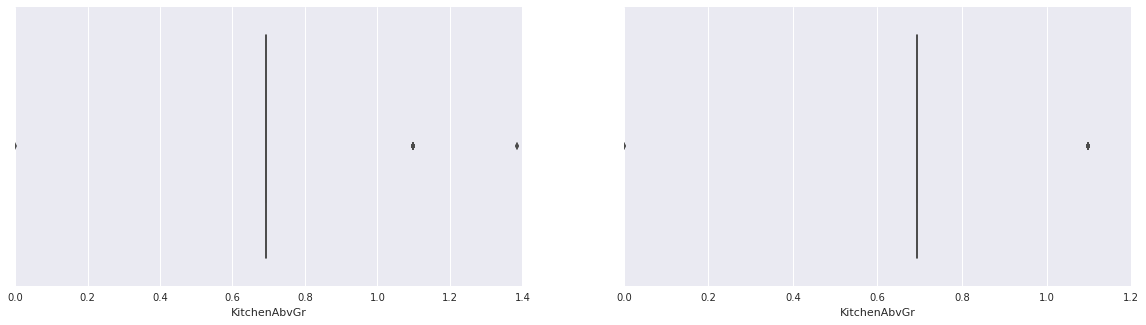

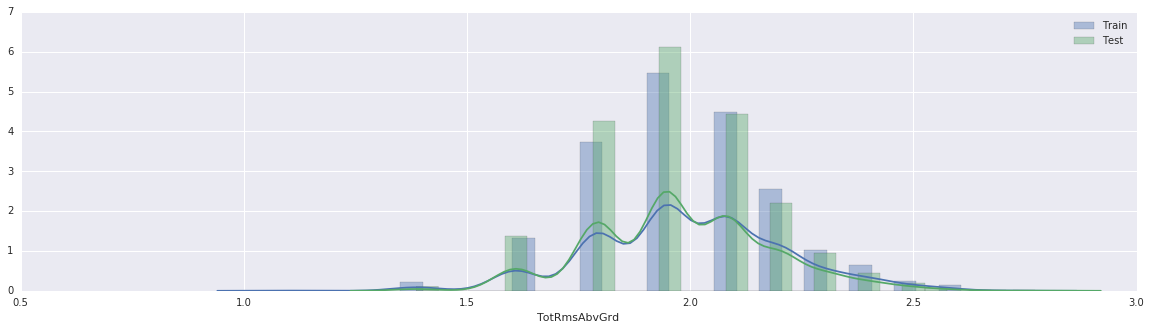

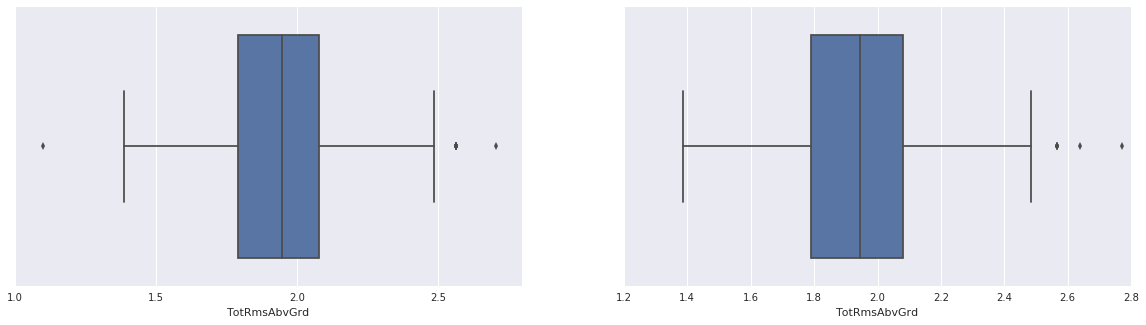

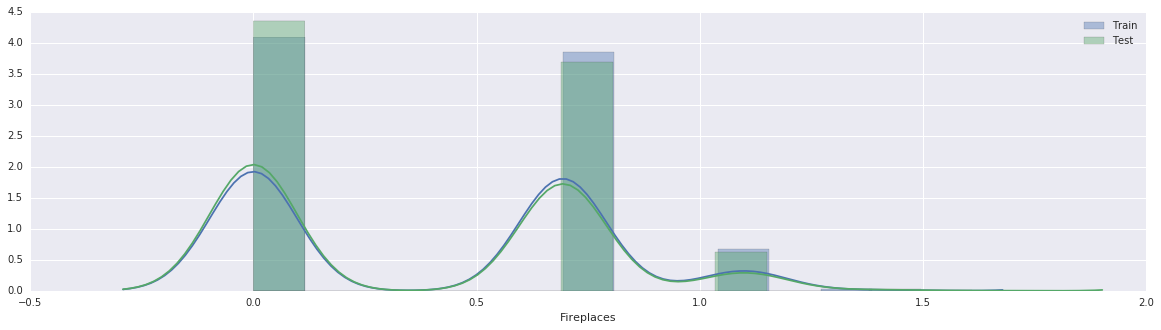

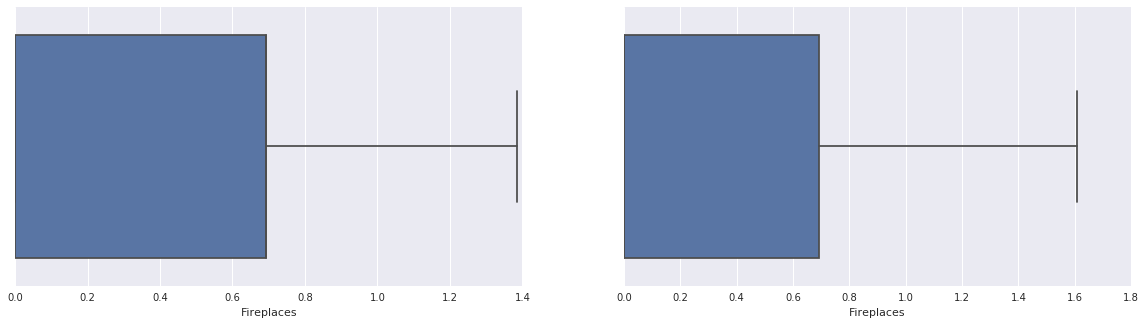

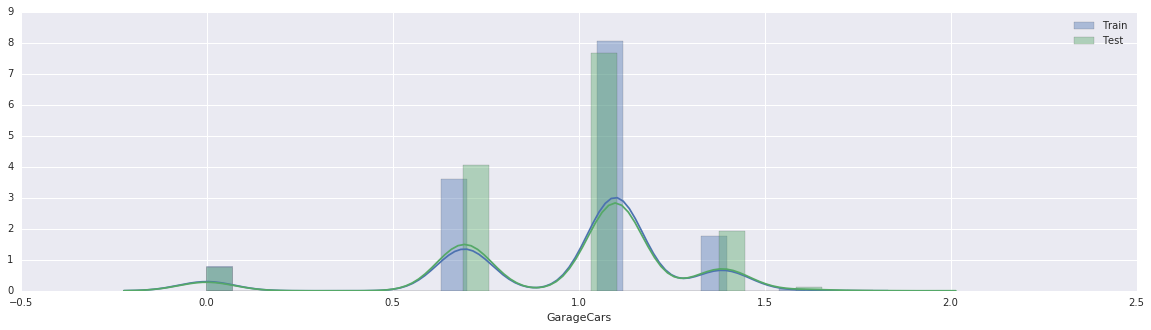

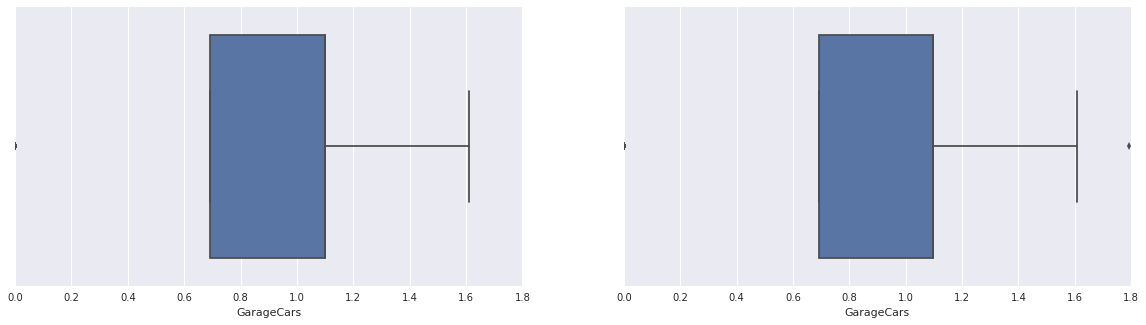

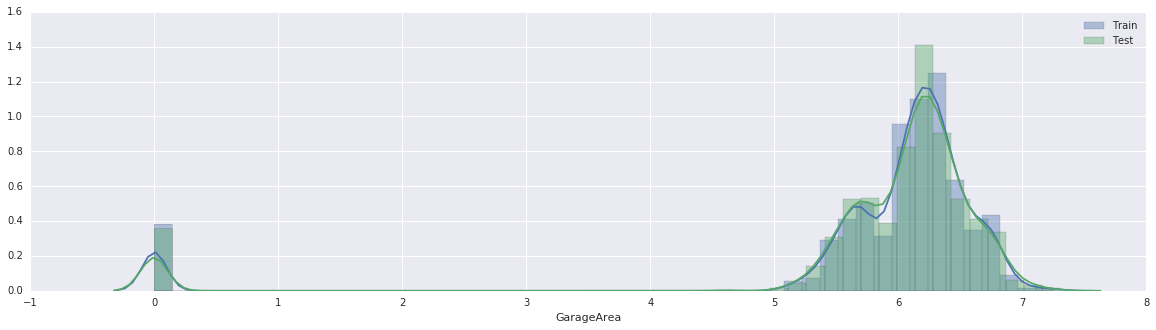

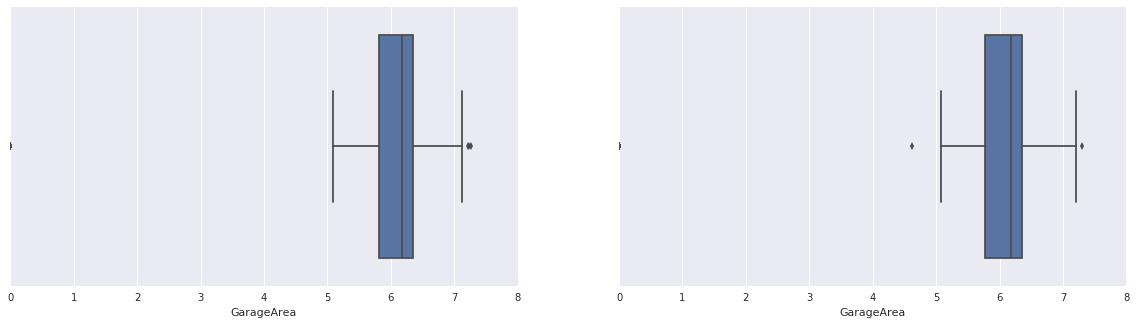

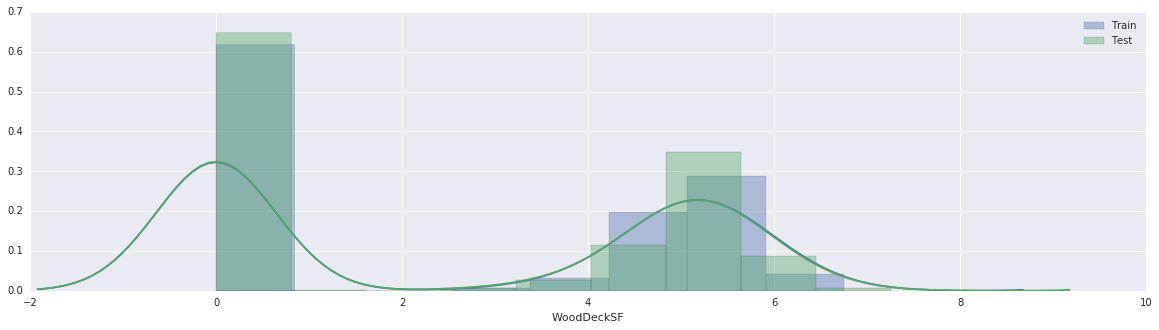

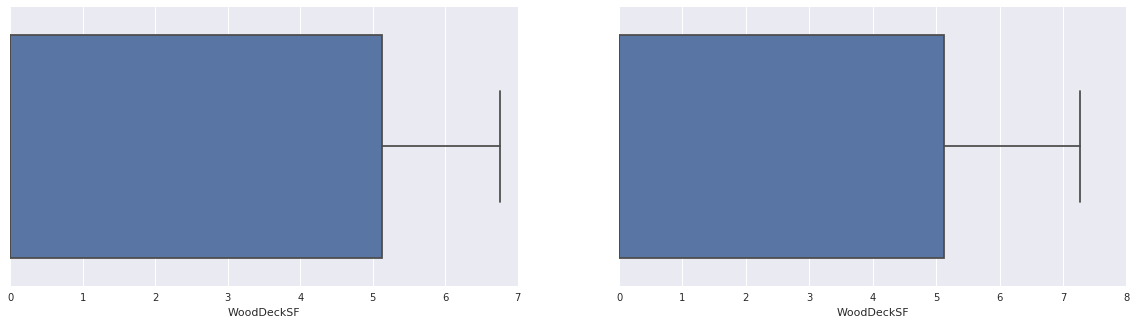

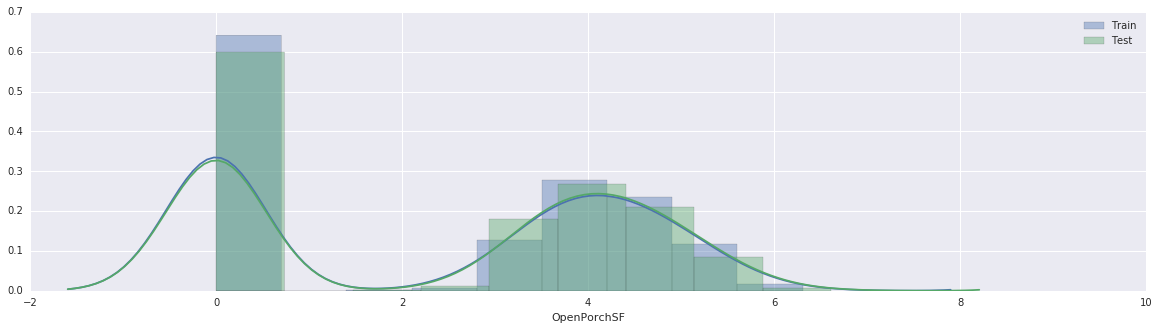

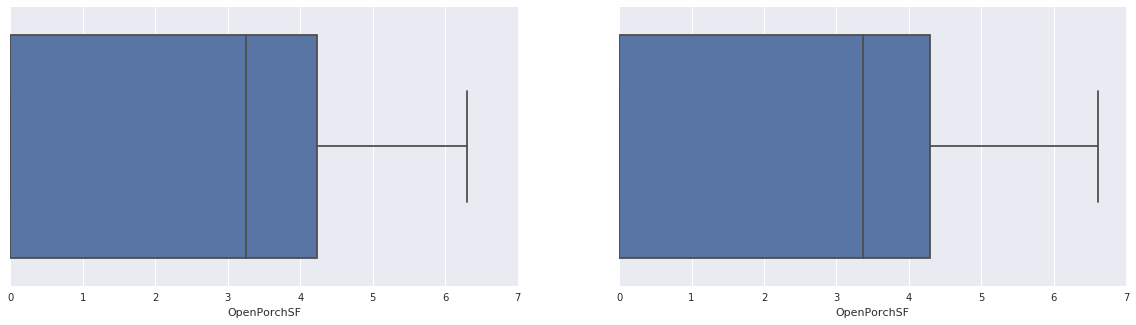

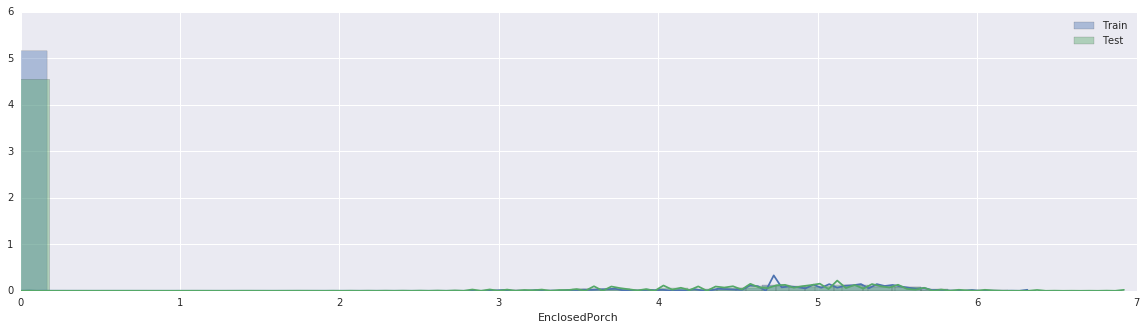

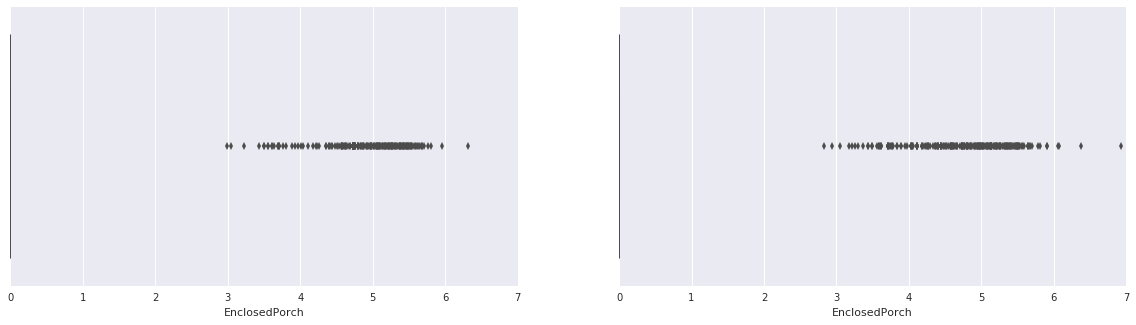

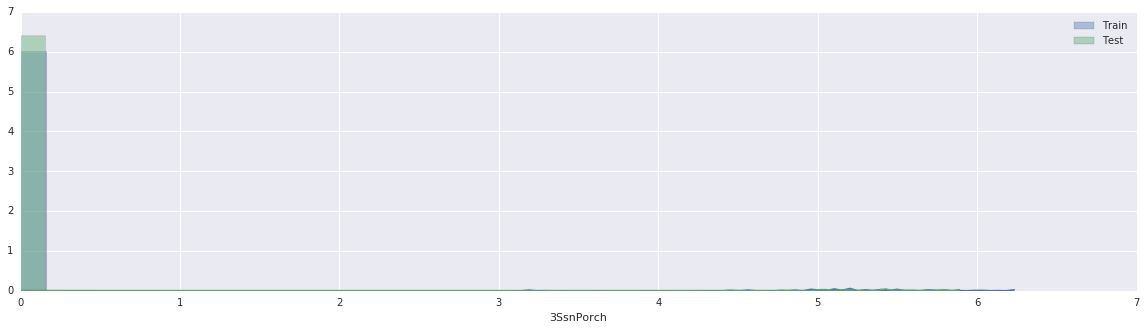

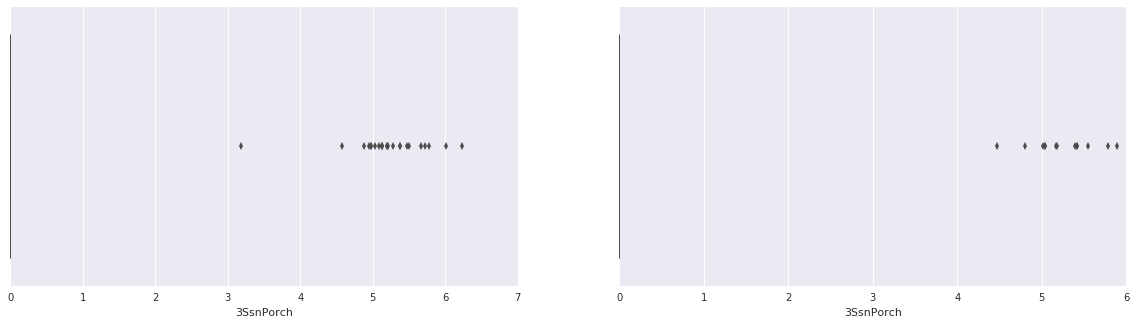

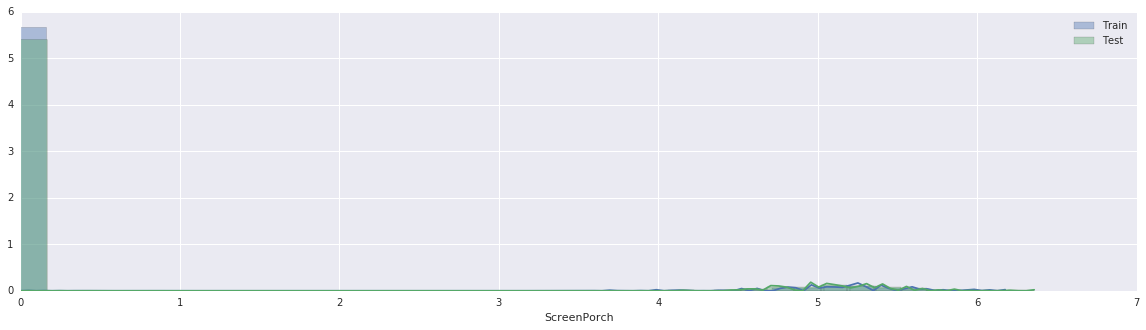

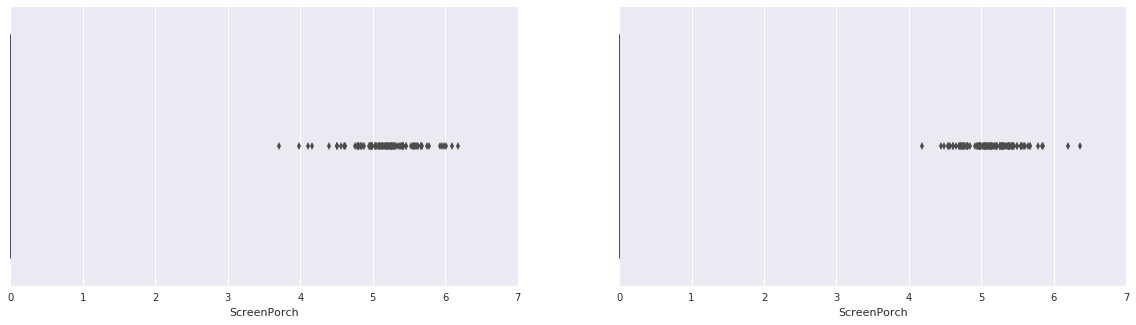

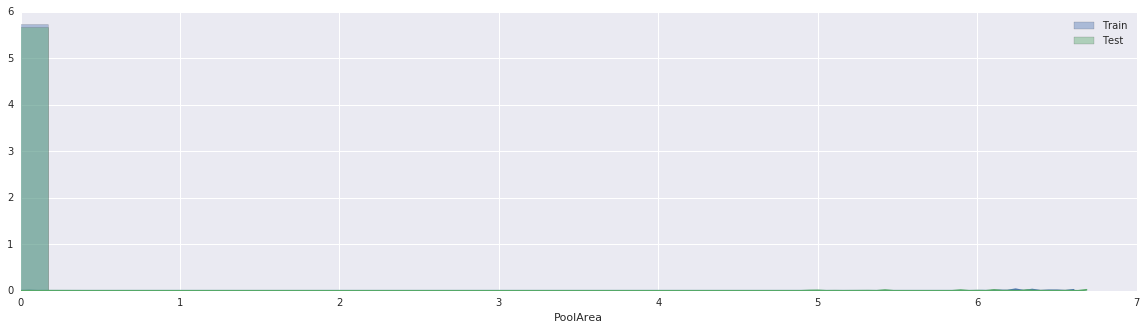

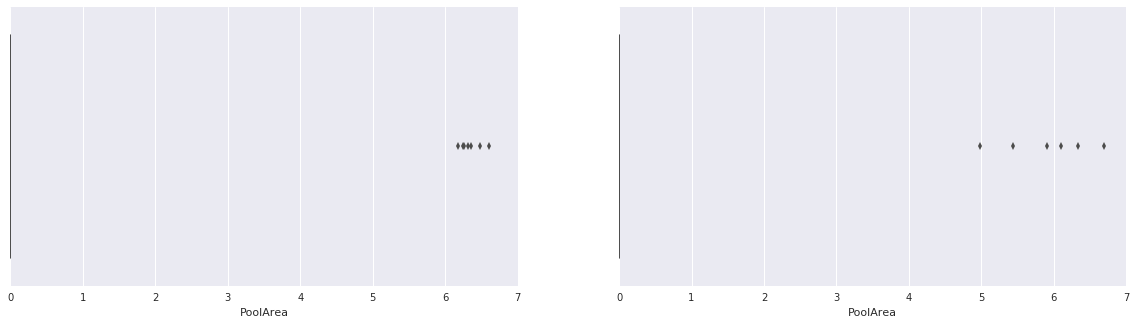

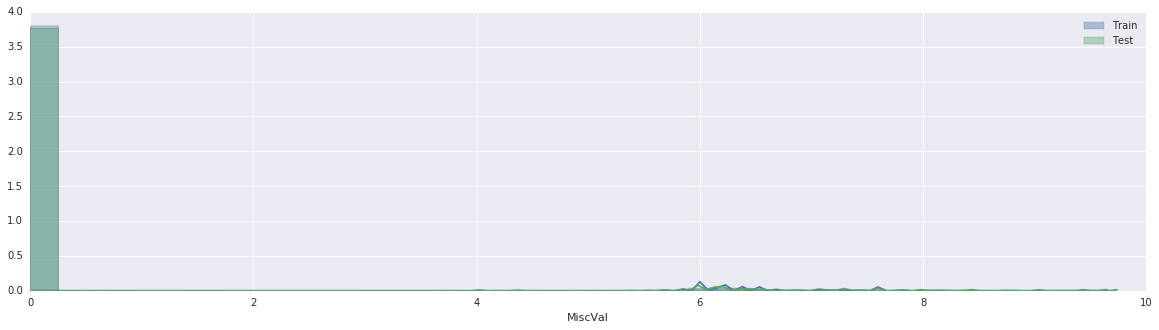

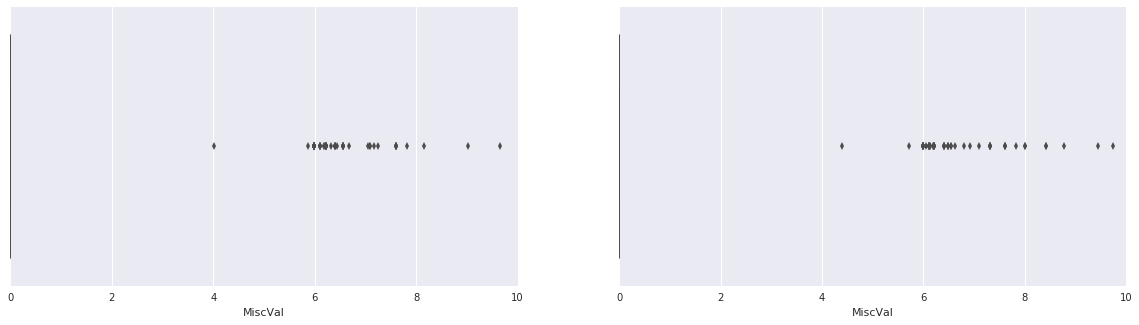

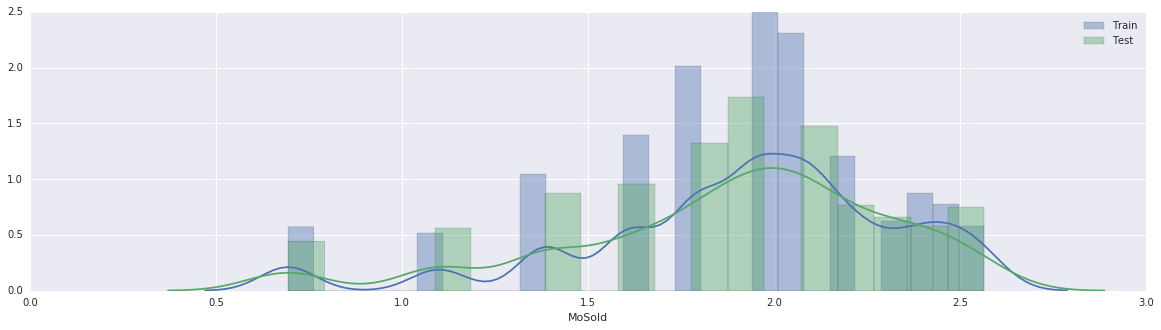

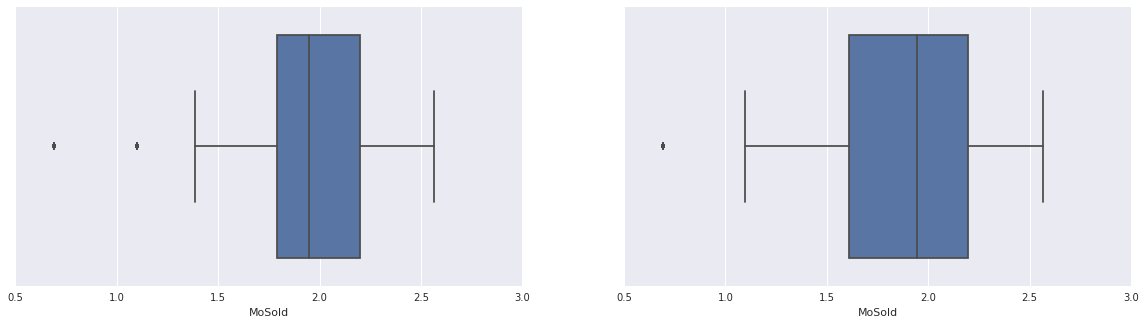

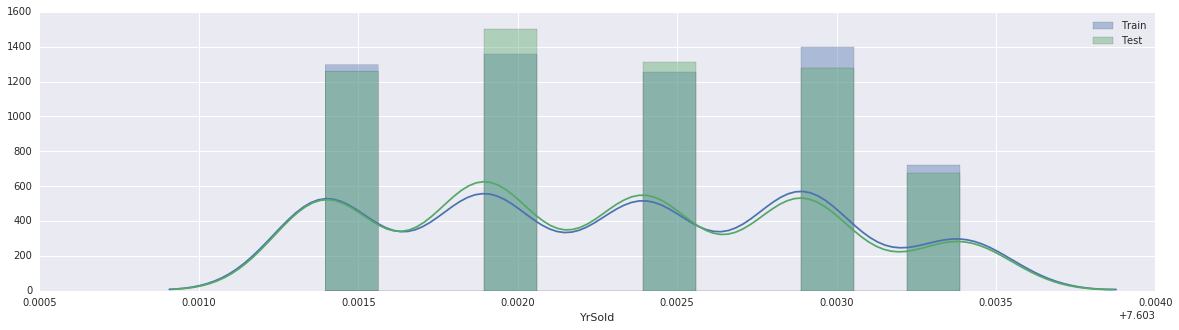

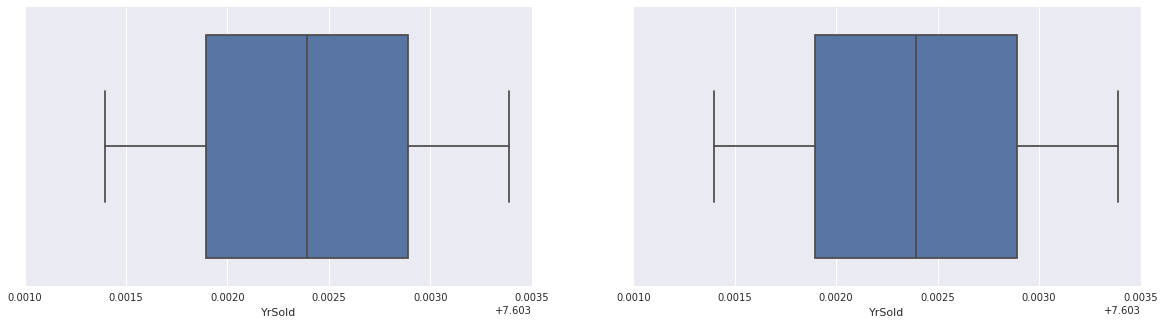

In [114]:
for column_name in continuous_int:
  process_continuous(column_name)

In [115]:
def categorical_histogram(column_name, train, test):
  
  plt.figure(figsize=(20,5))

  order = train[column_name].unique()

  sns.countplot(train[column_name], label='Train', alpha=0.5, order=order)
  sns.countplot(test[column_name], label='Test', alpha=0.5, order=order)

  plt.legend()
  plt.show()

In [1]:
def process_categorical(column_name):
  
  global train, train_trans, test, test_trans
  
  train_trans.append(pd.get_dummies(train[column_name], prefix=column_name, dummy_na=True))
  test_trans.append(pd.get_dummies(test[column_name], prefix=column_name, dummy_na=True))
  
  categorical_histogram(column_name, train, test)

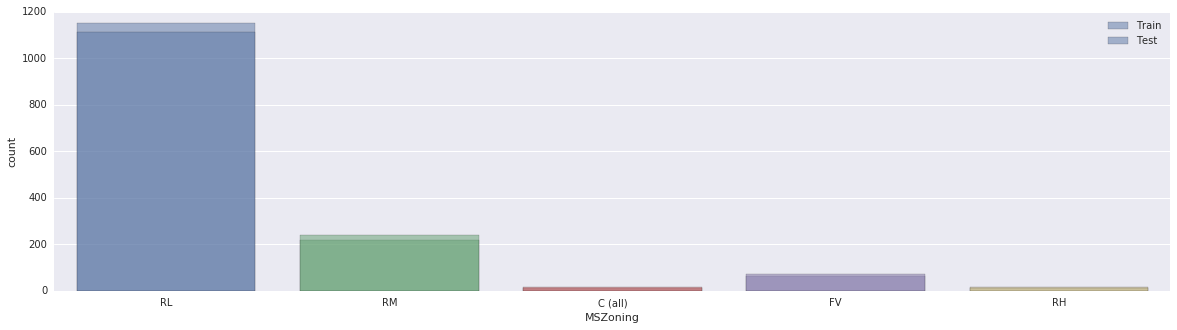

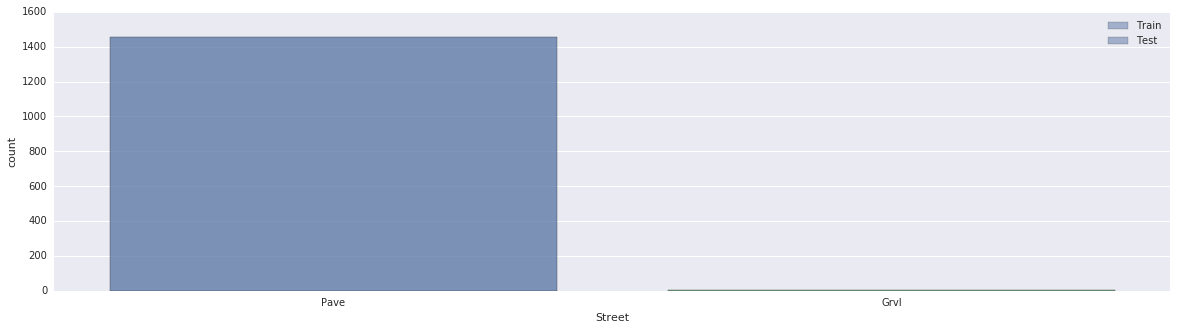

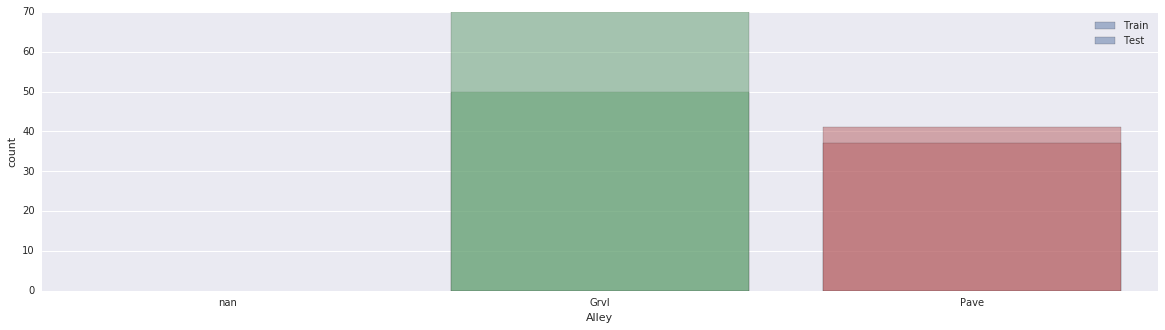

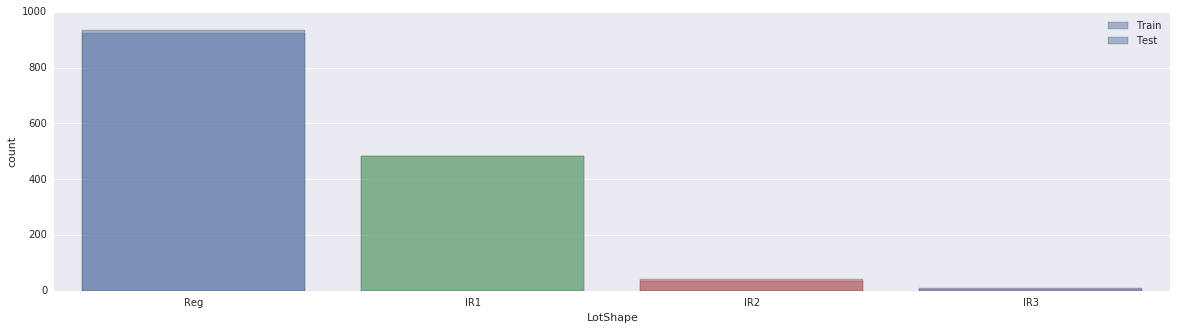

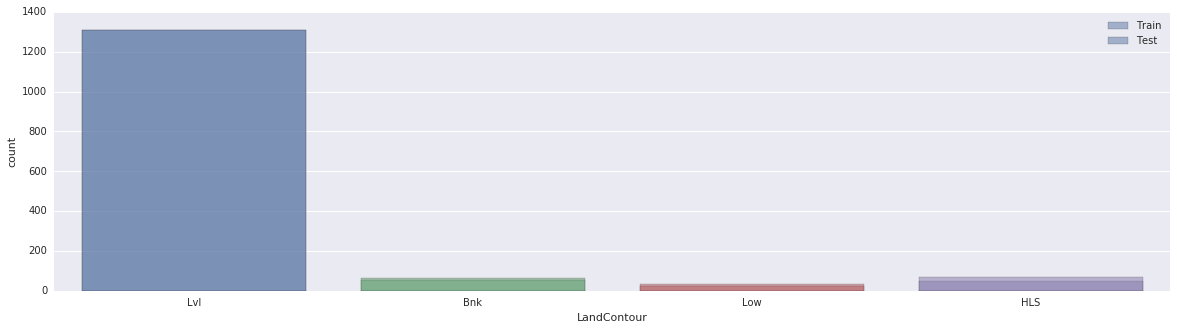

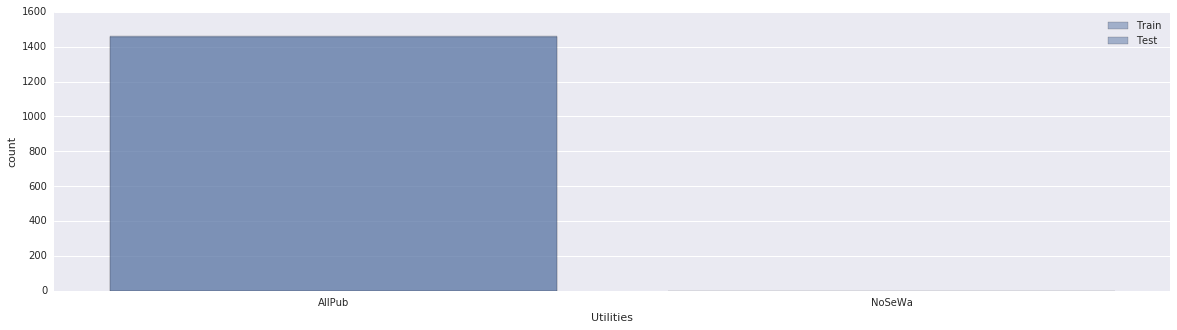

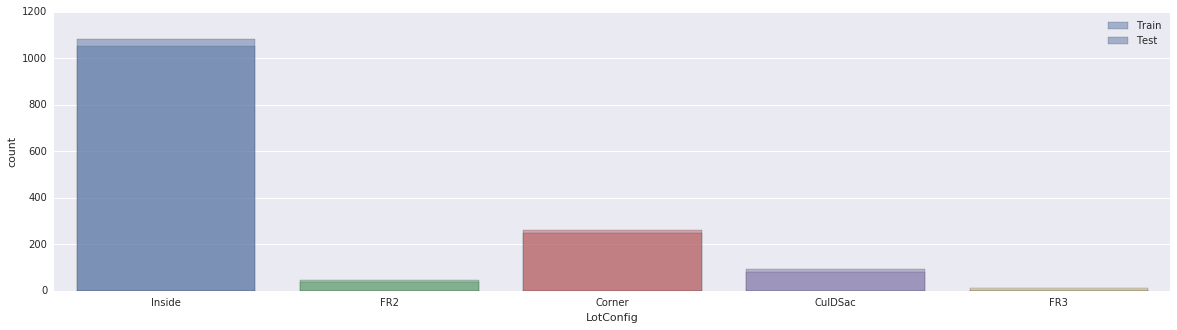

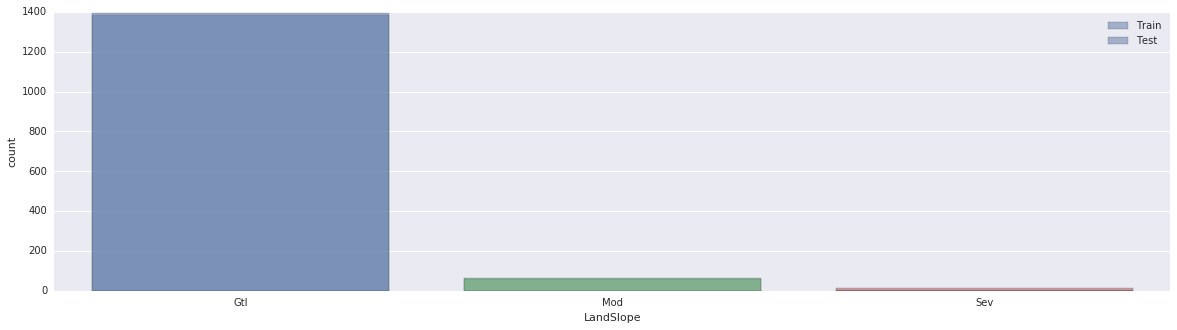

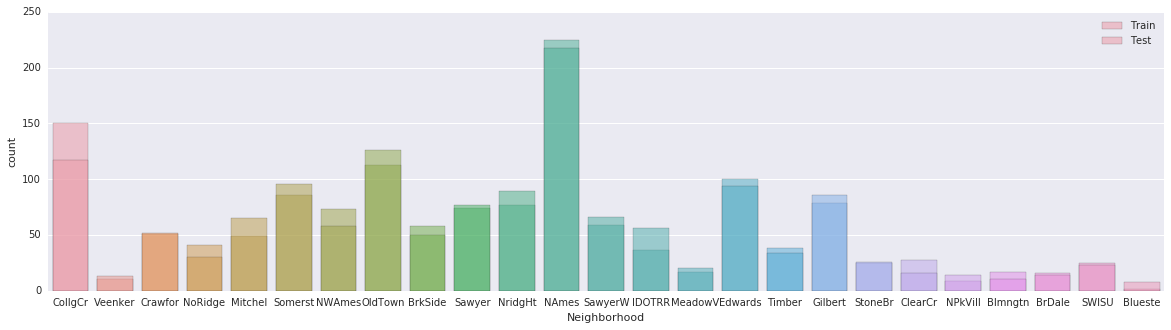

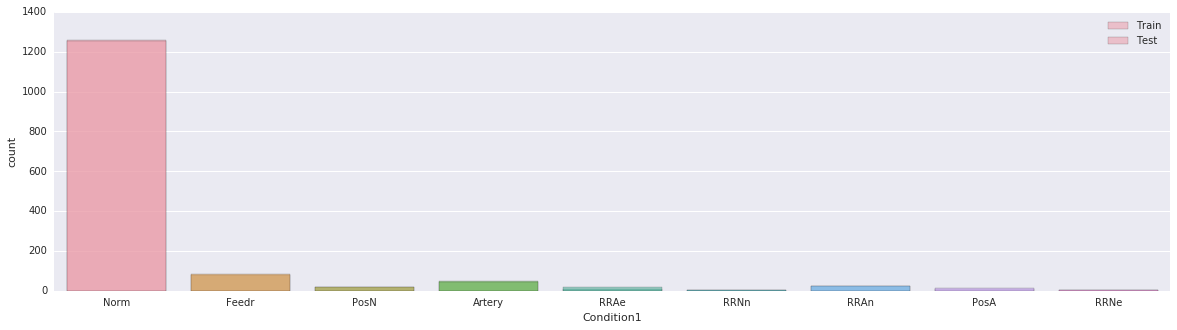

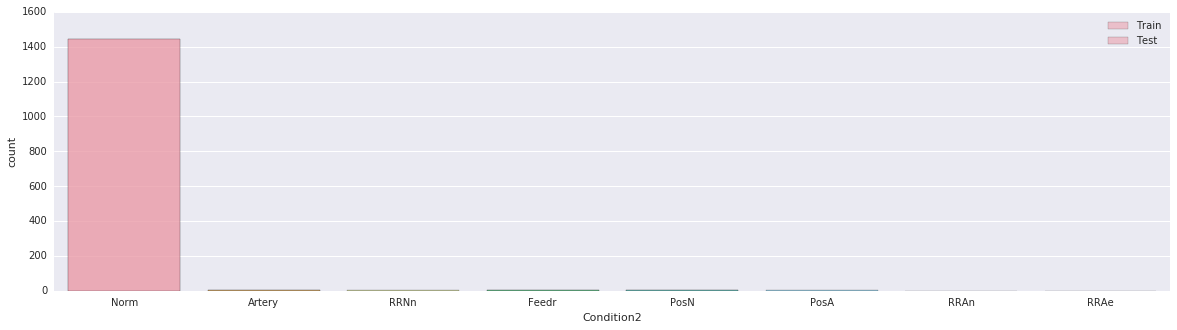

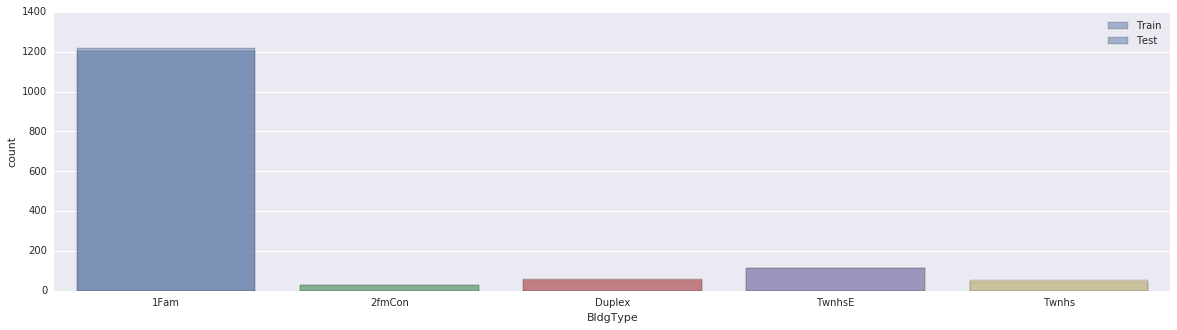

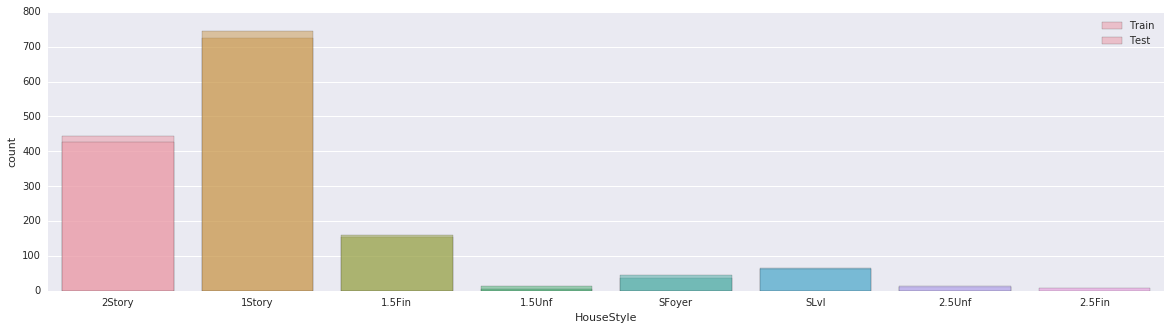

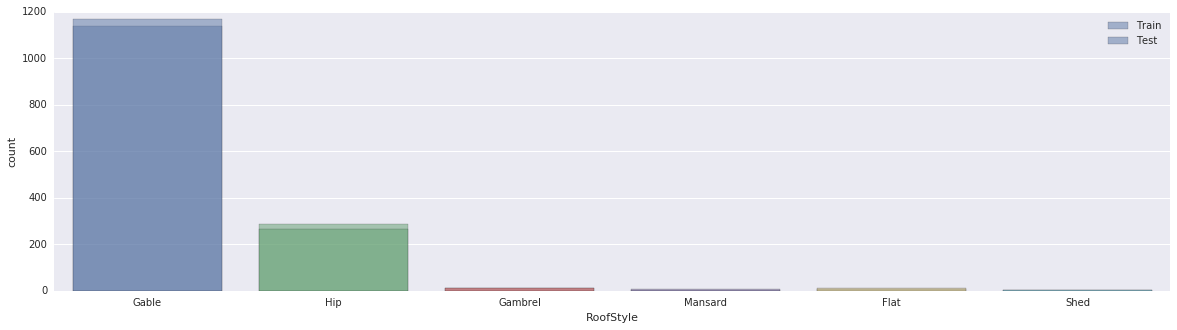

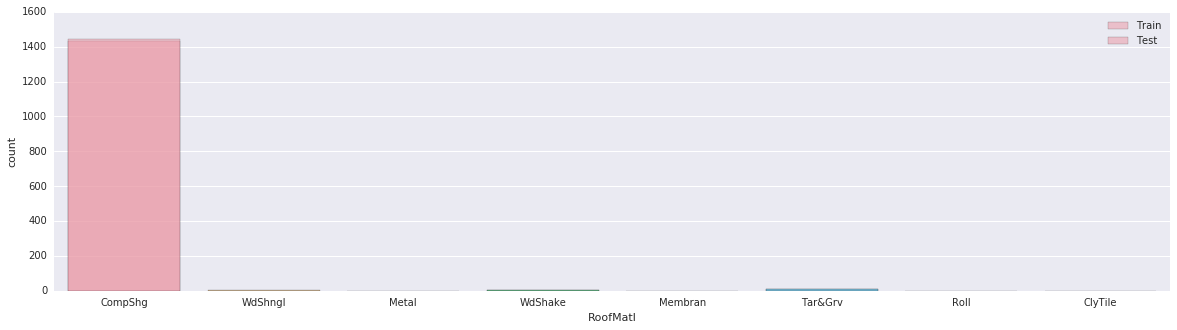

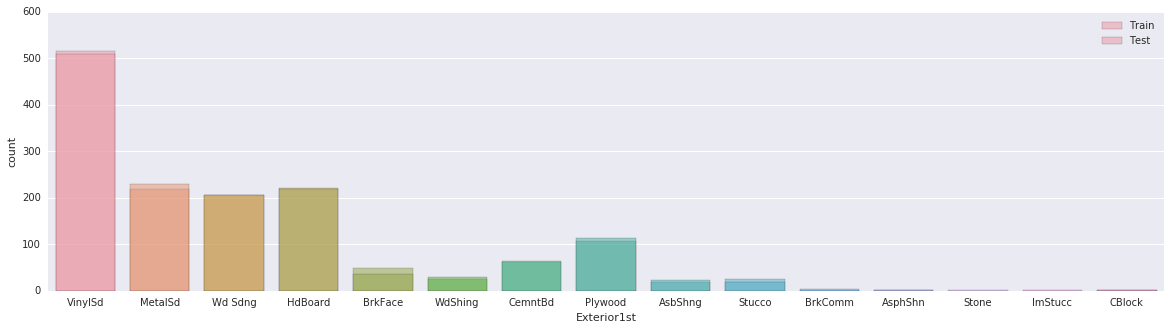

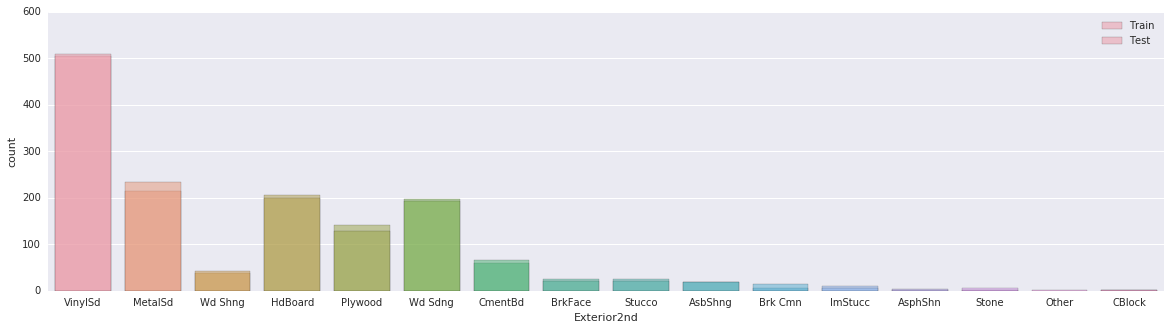

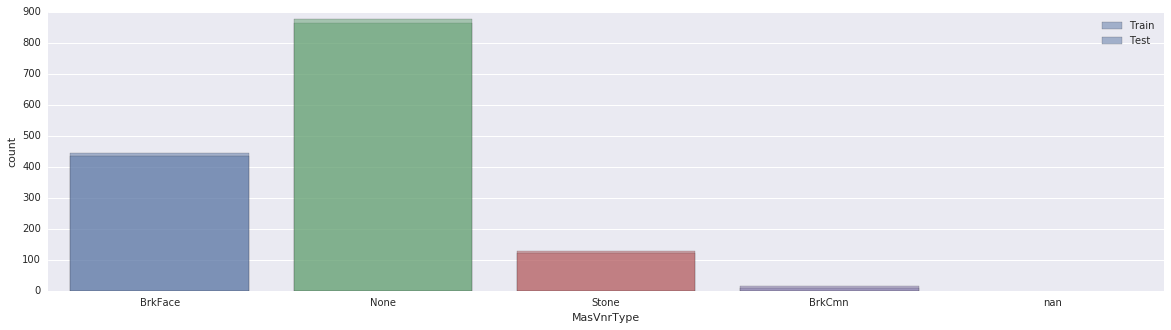

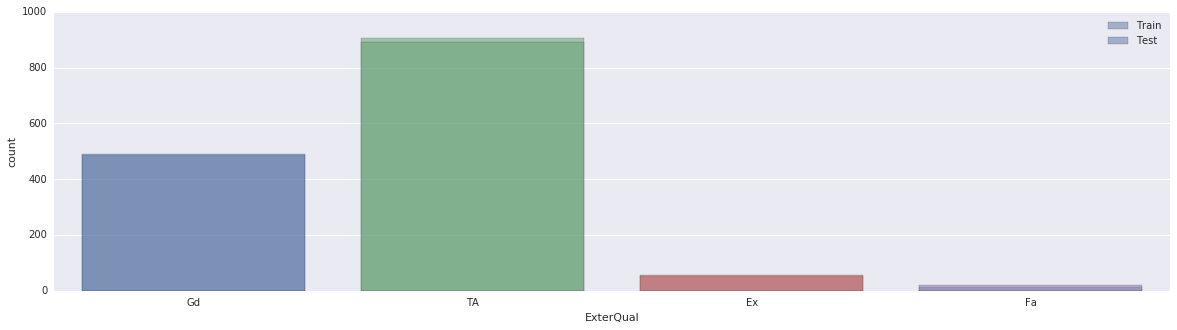

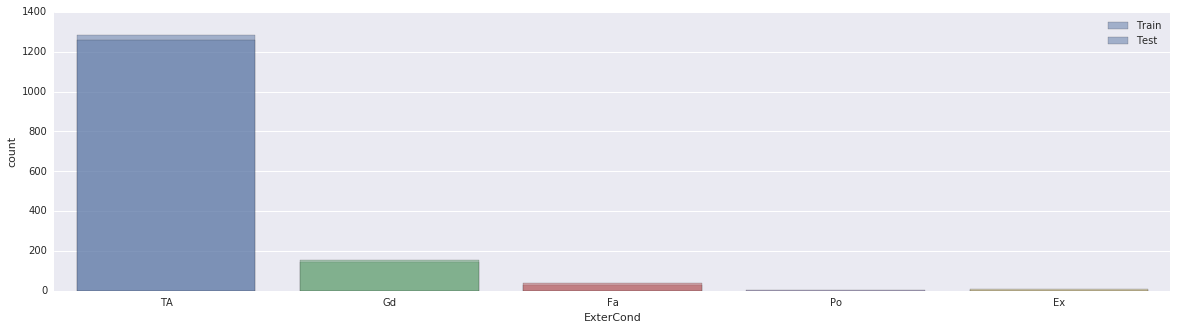

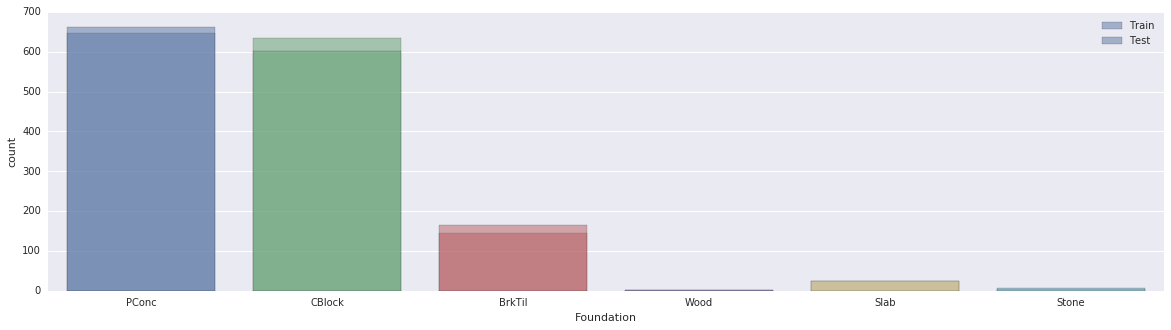

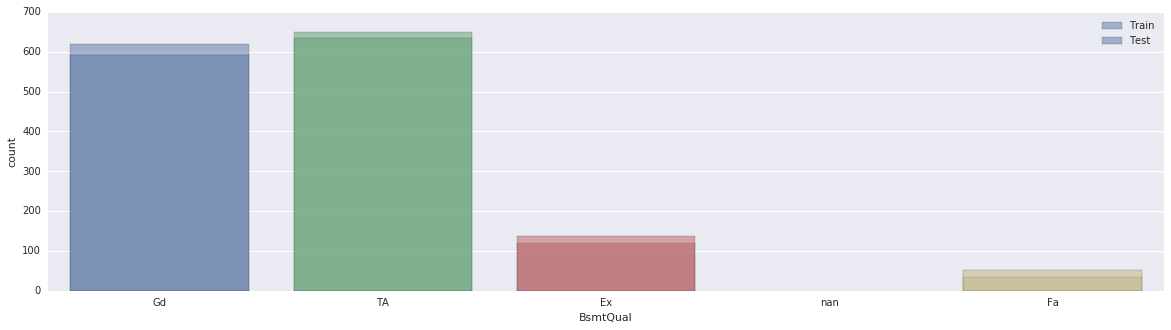

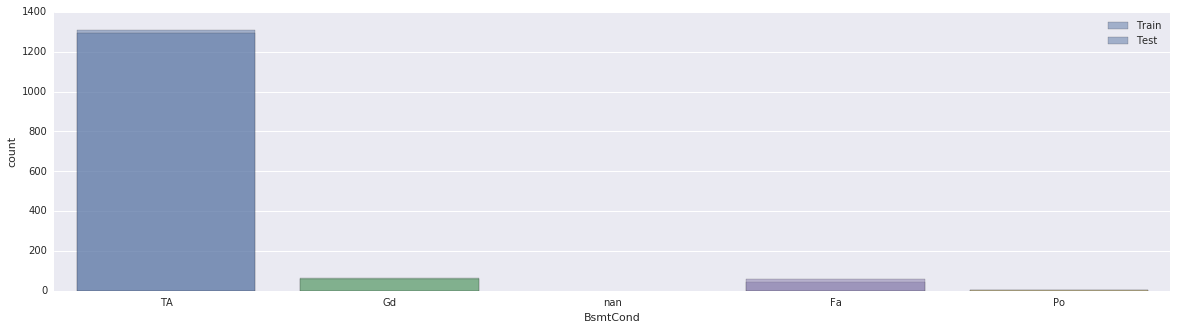

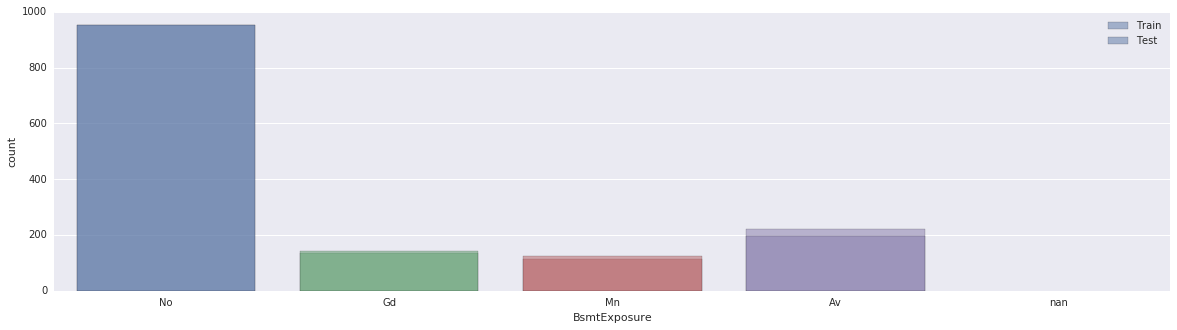

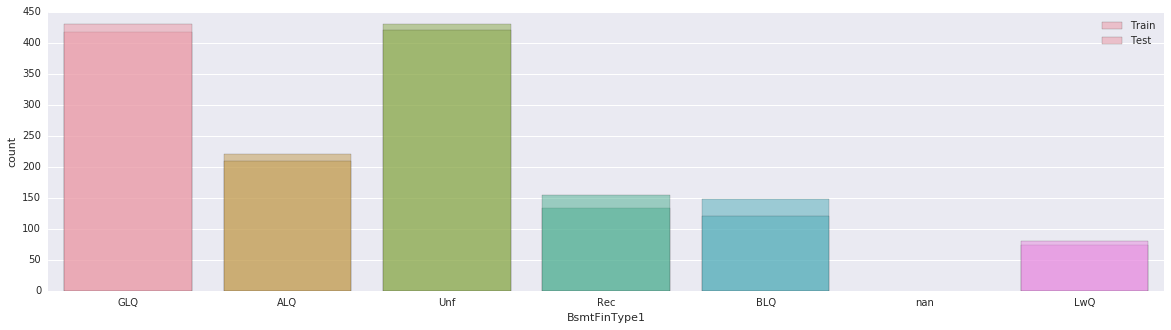

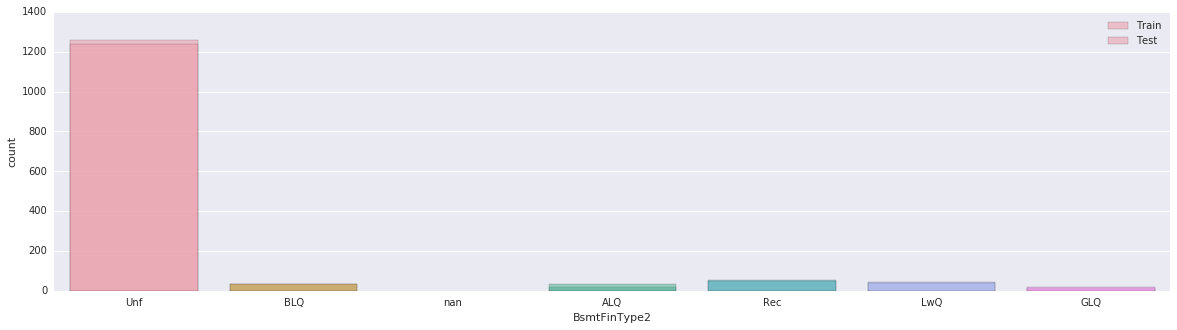

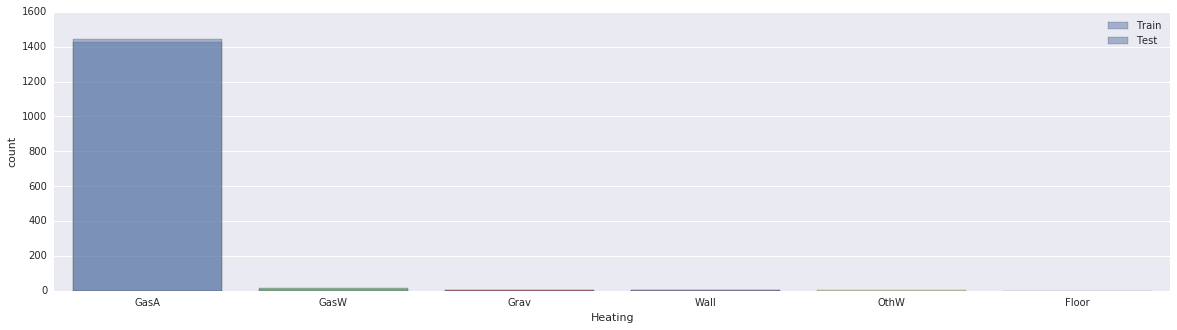

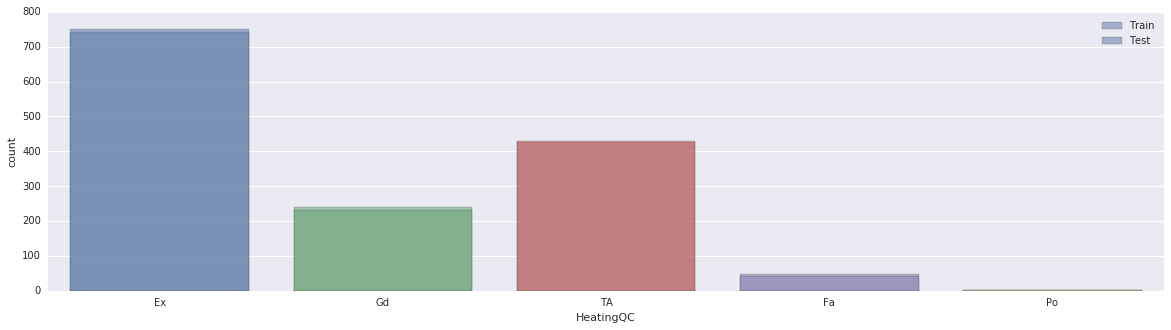

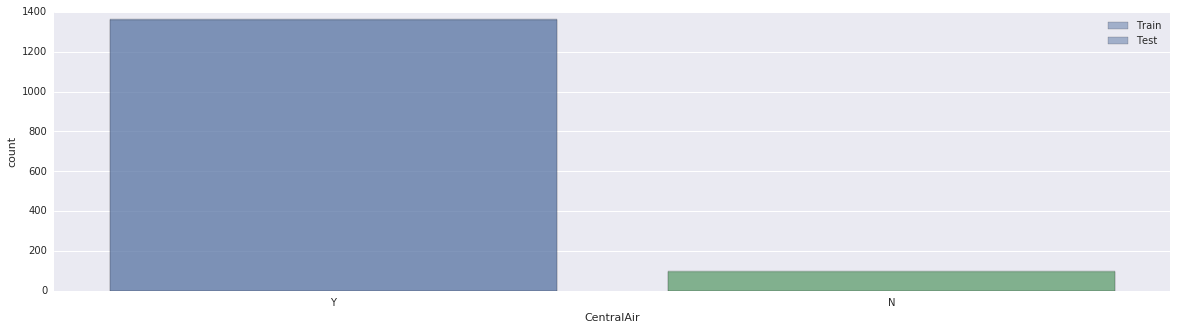

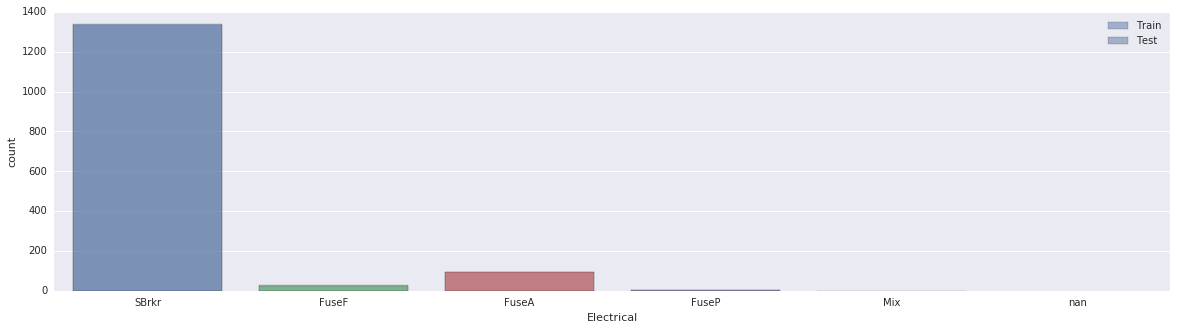

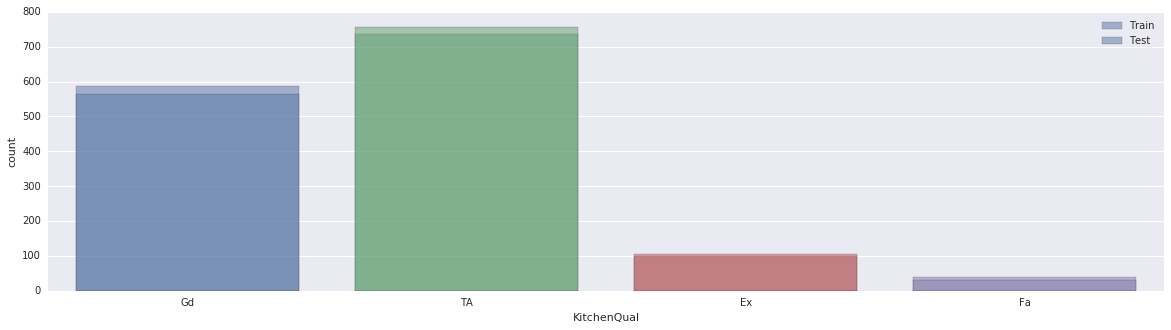

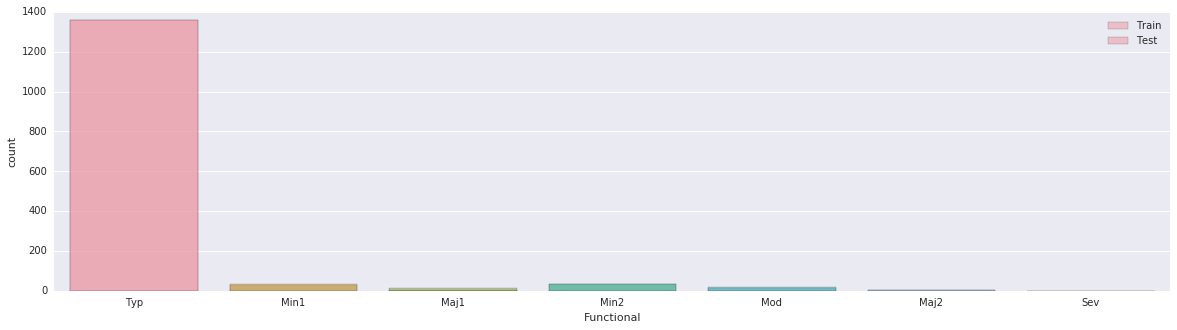

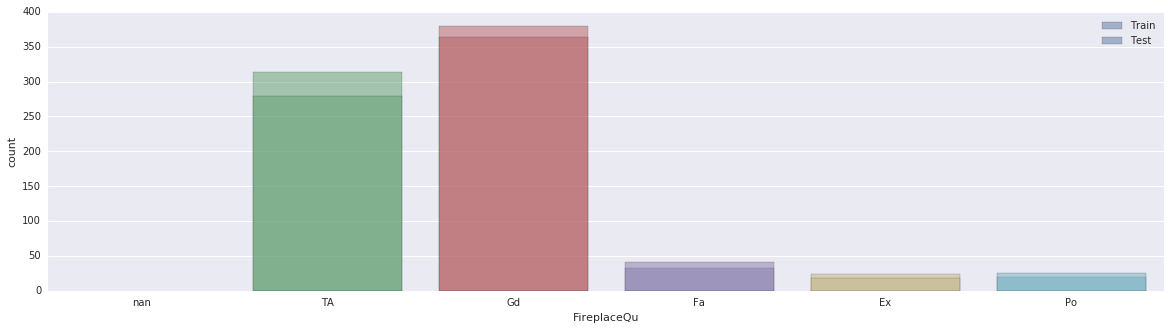

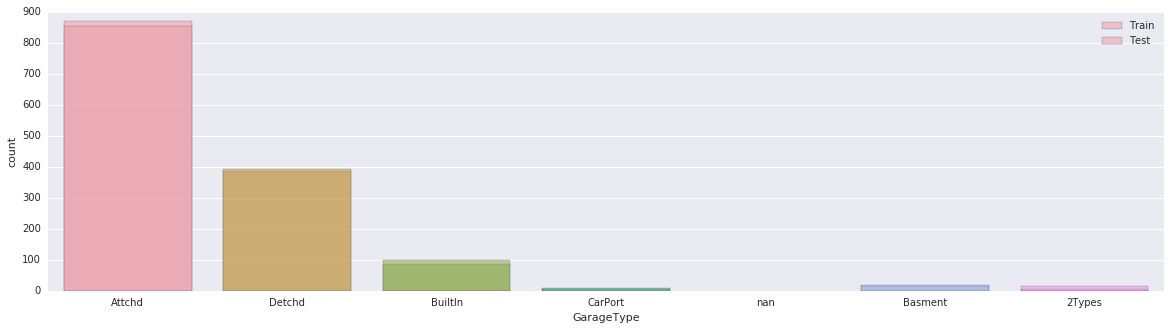

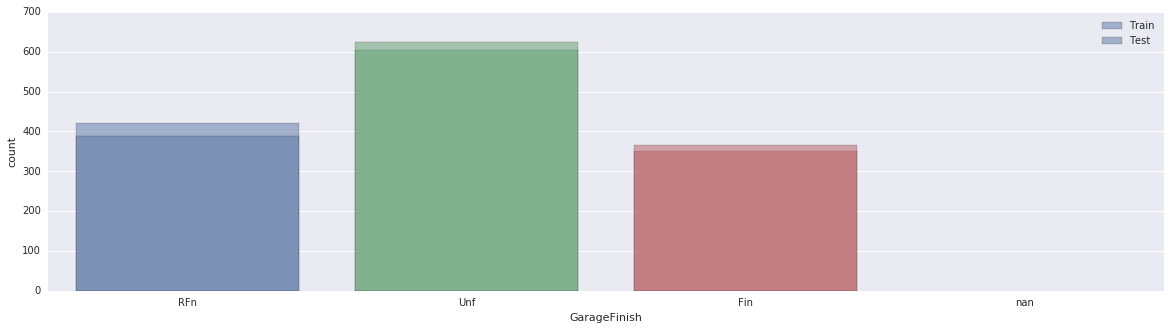

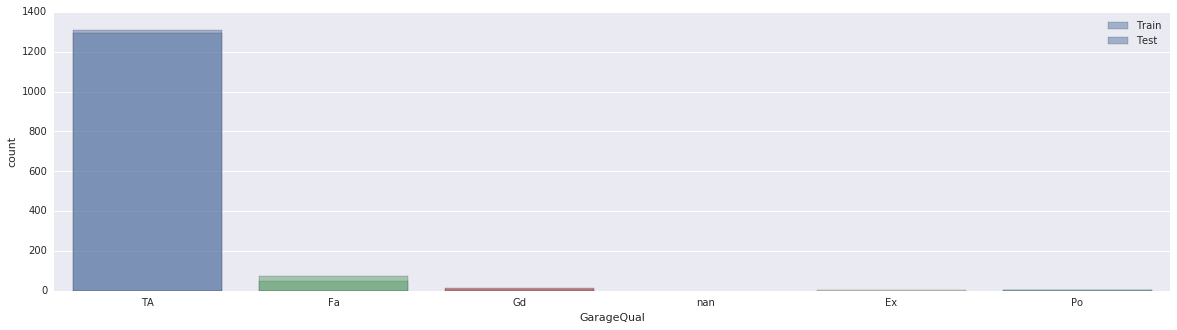

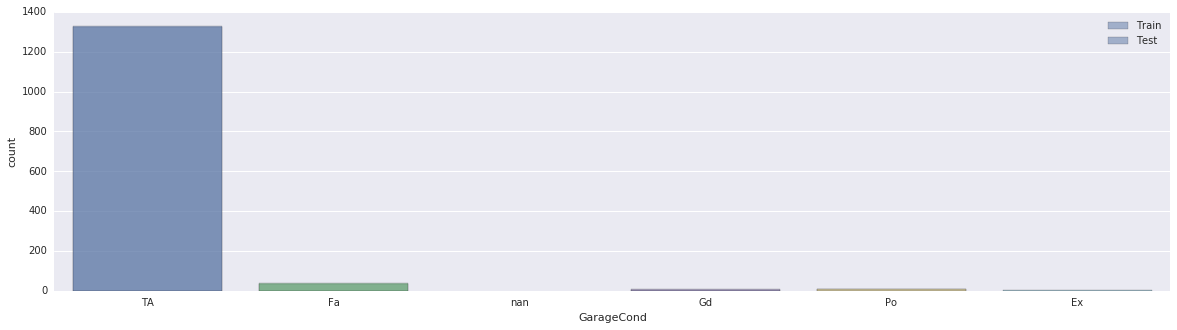

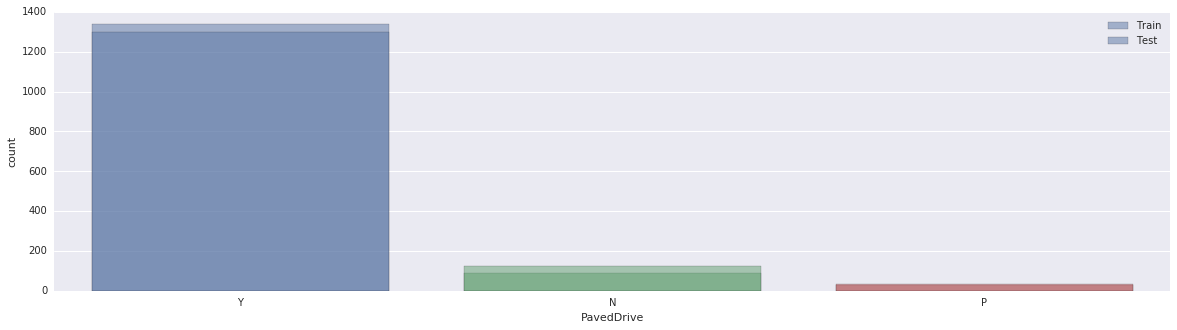

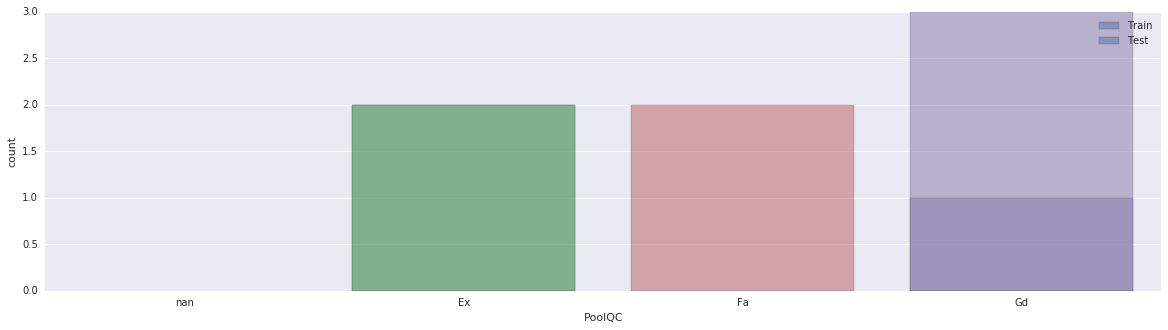

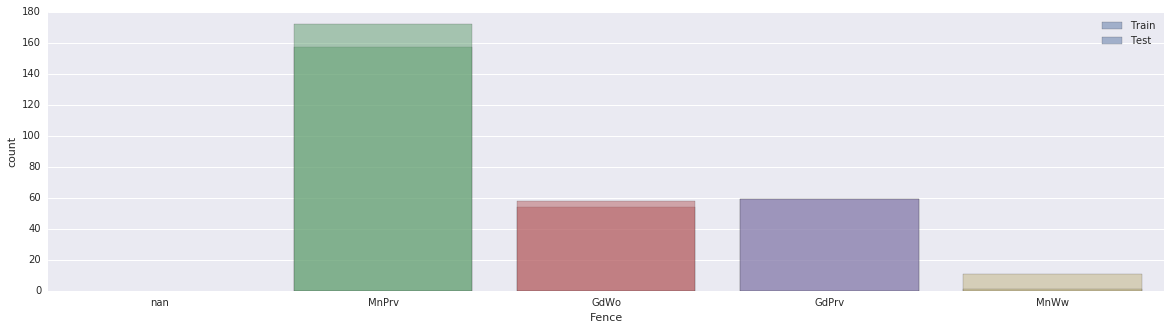

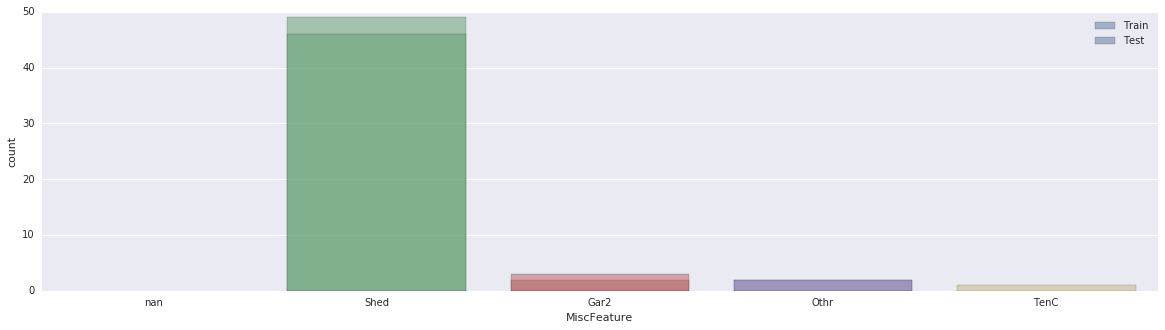

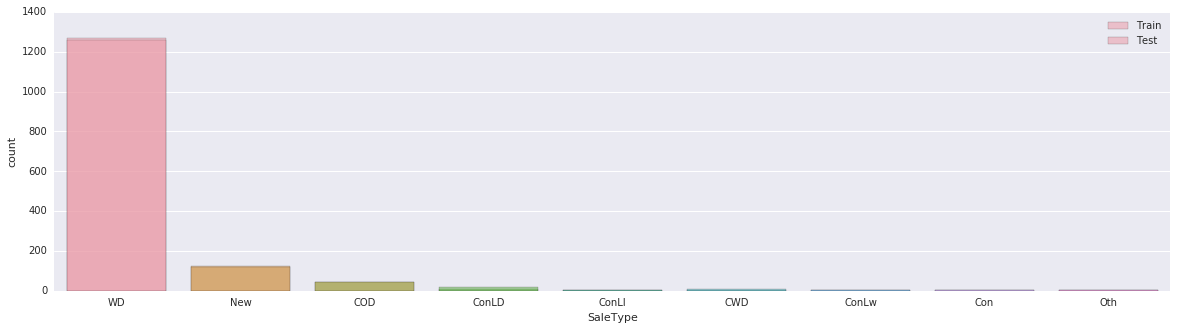

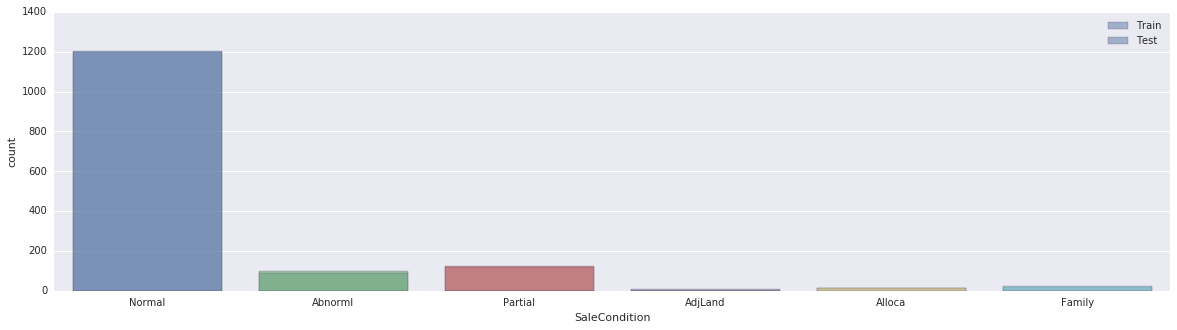

In [117]:
for column_name in categorical_text:
  process_categorical(column_name)

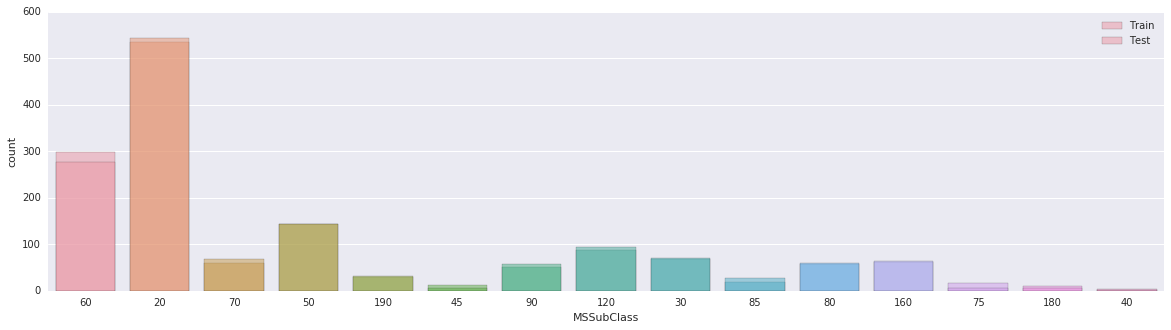

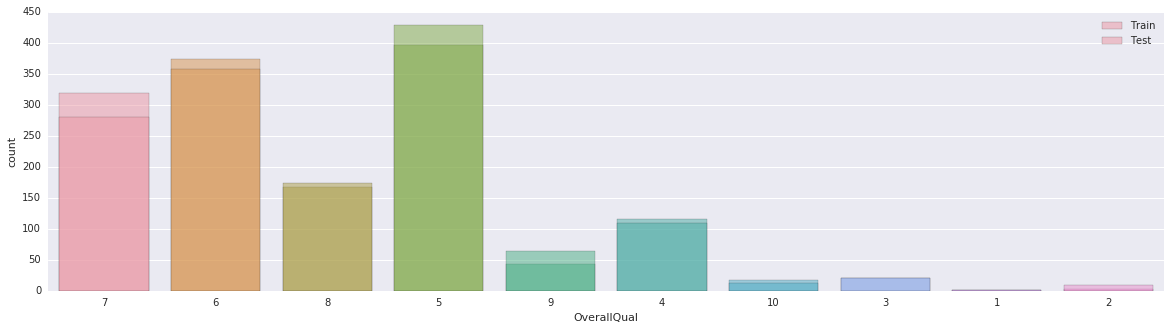

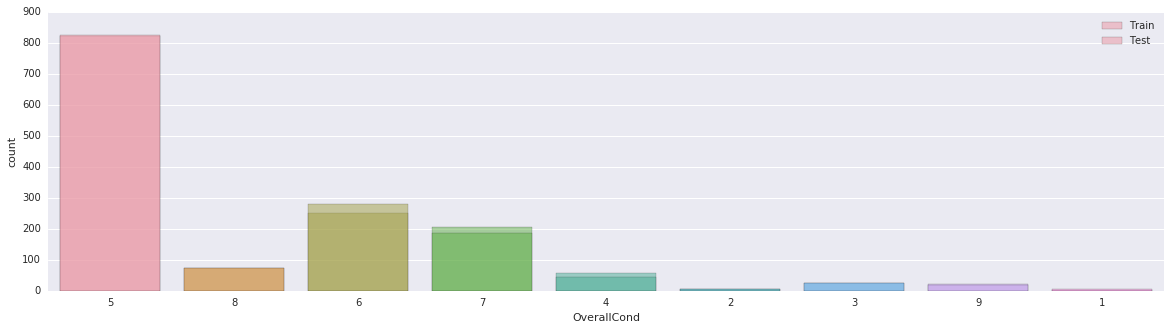

In [118]:
for column_name in categorical_int:
  process_categorical(column_name)

In [119]:
train_trans['Id'] = train.Id
train_trans['SalePrice'] = np.log(train.SalePrice)

test_trans['Id'] = test.Id

In [120]:
train_trans.to_csv('train_trans.csv', index=False)
test_trans.to_csv('test_trans.csv', index=False)